# Последовательности событий как временные точечные процессы, моделирование с использованием трансформеров

## План

- Определения
- Примеры
- Теоретические задачи
- Синтетические задачи
- Эксперименты на реальных данных

## Определения

### Классические временные ряды

- Плотные
- Одинаковые задержки
- Задачи регрессии
- Примеры:
  - Ежедневная температура в Москве
  - Курс валютной биржи

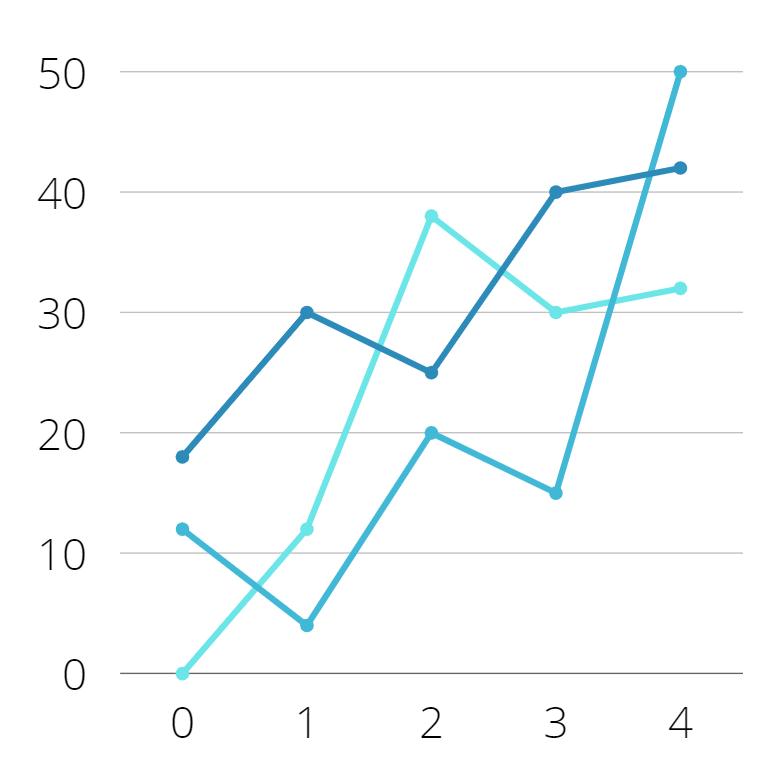

Таким образом, у нас есть некоторое значение, которое мы регулярно наблюдаем, а затем работаем с этими собранными данными. Однако иногда этот подход не применим. Например, банковские транзакции. Они могут происходить несколько раз в день или могут происходить раз в неделю или месяц.

### Точечные процессы в целом

Точечный процесс - это совокупность математических точек, случайно расположенных в математическом пространстве.

Временной точечный процесс - это точечный процесс на временной шкале.

Point Process is a collection of mathematical points randomly located in a mathematical space.

Temporal Point Process is a point process on a timeline.

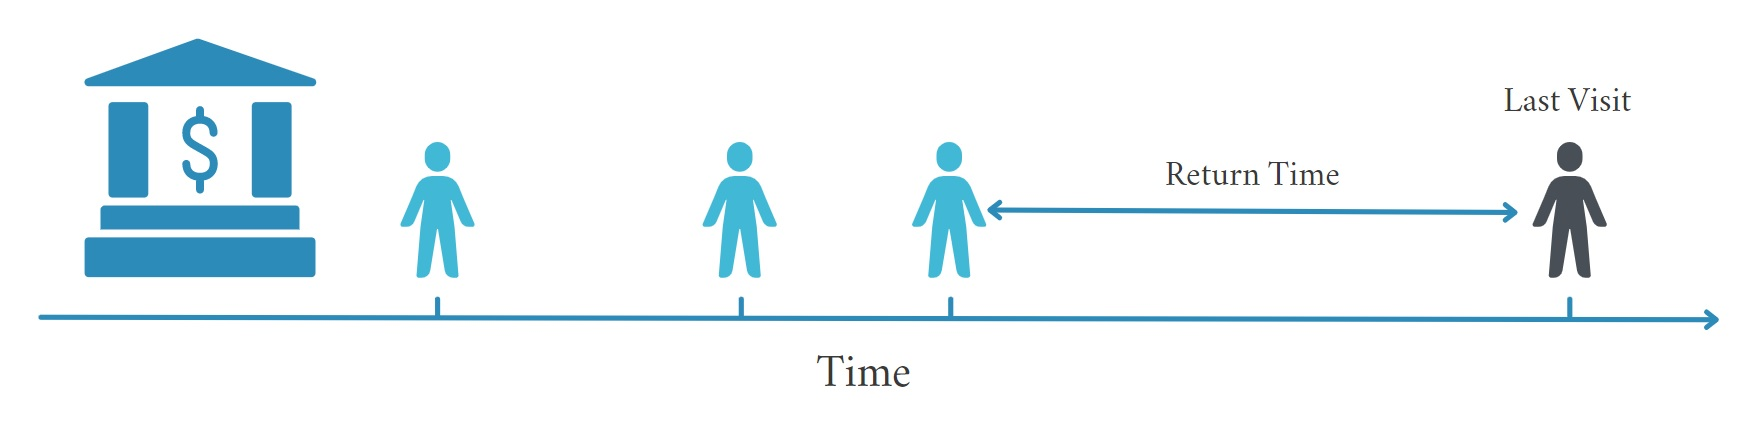

Реализация временного точечного процесса представляет собой последовательность событий $\mathbf{s} = \{(t_i,c_i)\}_{i=1}^N$. Здесь $t_i$ - это момент времени, когда произошло событие, а $c_i\in\mathcal{C}$ - тип события.

Одним из наиболее распространенных способов описания временных точечных процессов является использование функции интенсивности.

$$
\lambda_c(t|\mathcal{H}_t^{\mathcal{C}}) = \frac{\mathbb{E}[dN_c(t|\mathcal{H}_t^{\mathcal{C}})]}{dt} = p(T\in[t;t+dt),C=c|t_i>t)
$$

Эта интенсивность показывает вероятность того, что событие типа $c$ произойдет в полуинтервале $[t;t+dt)$. $N_c(t)$ - это функция подсчета, которая показывает количество событий до момента времени $t$.

### Процесс Пуассона

Процесс Пуассона является самым простым из точечных процессов, который мы можем рассмотреть. В случае процесса Пуассона мы предполагаем, что функция интенсивности не зависит от истории событий.

$$
\lambda_c(t|\mathcal{H}_{t}^{\mathcal{C}}) = \lambda_c(t)
$$

Мы можем рассмотреть **однородный** и **неоднородный** процессы Пуассона. В первом случае предполагается, что нет зависимости от времени, и $\lambda(t) = \lambda$.

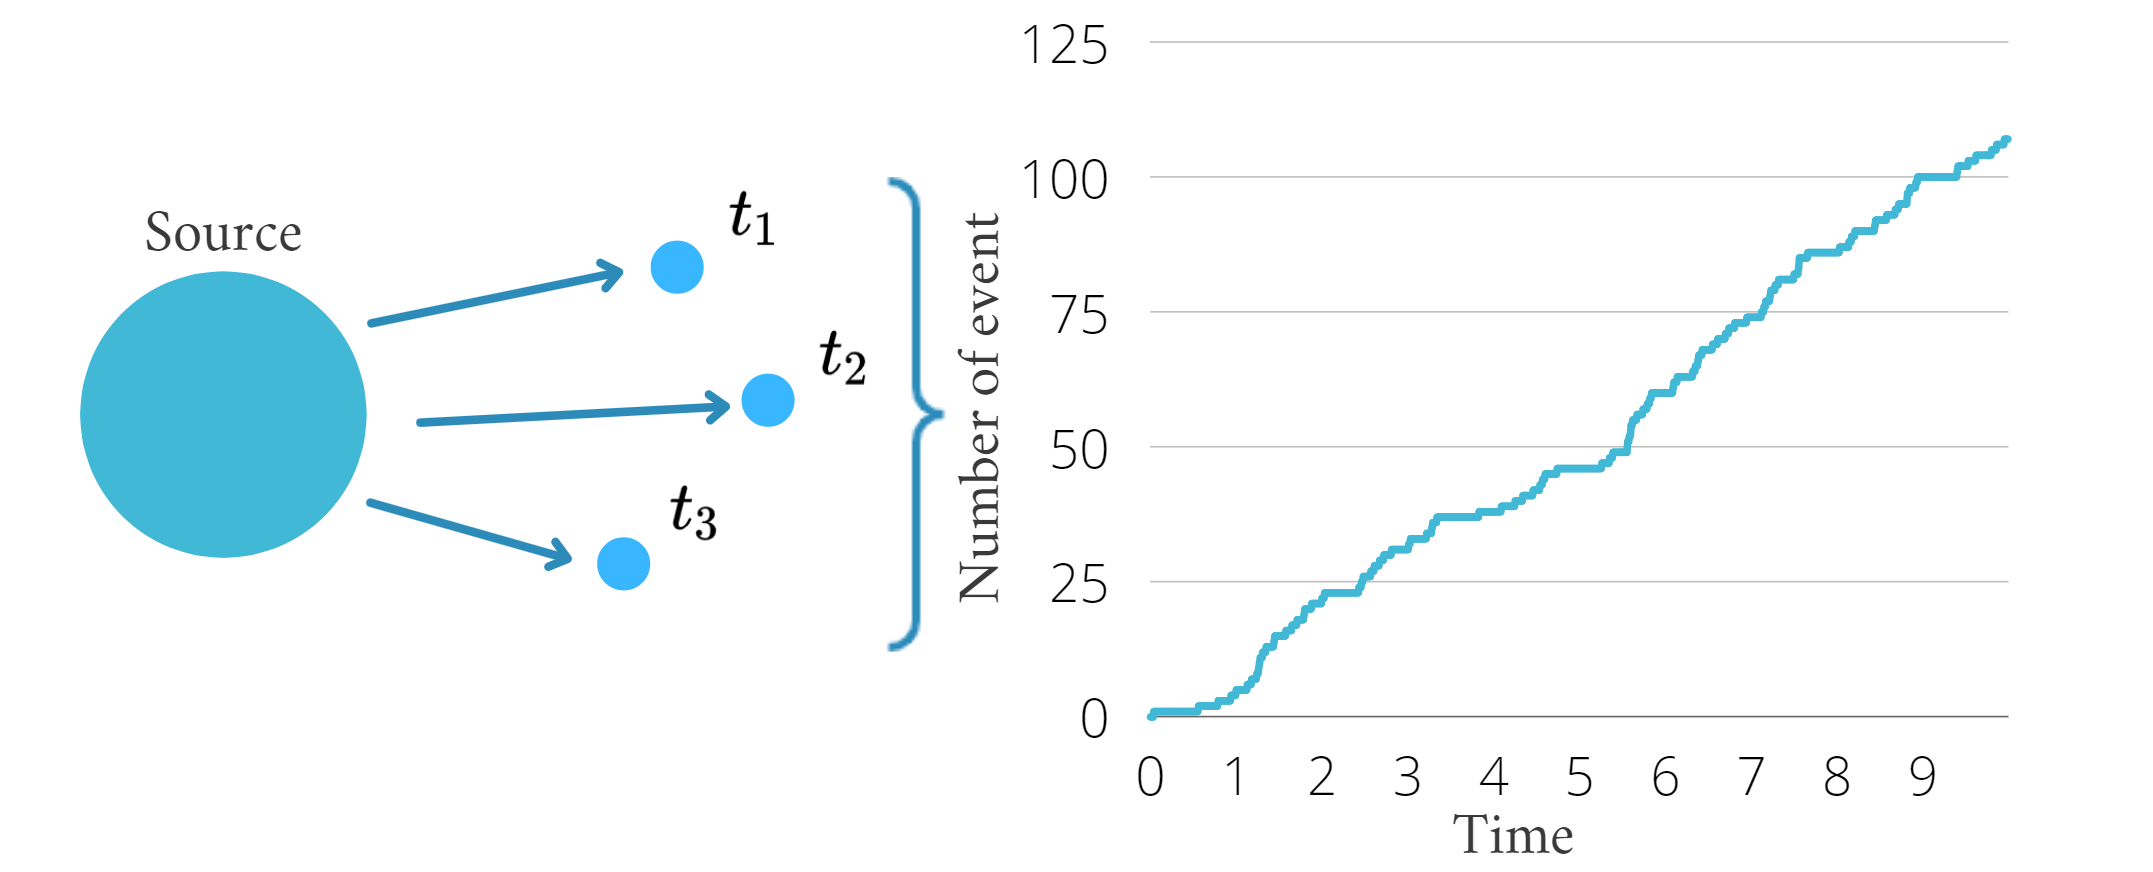

Угловой коэффициент функции подсчета равен интенсивности. Мы проверим этот факт позже в экспериментах.

### Процесс Хоукса

Впервые процессы Хокса были представлены в 1971 году, и в оригинальной работе использовались экспоненциальные ядра.

**Предположения**

- История влияет на интенсивность.
- Процесс самовозбуждающийся, воздействия неотрицательны.
- Воздействия аддитивны.

Функция интенсивности $\lambda_c(t|\mathcal{H}_t^{\mathcal{C}}) = \mu_c(t) + \sum_{i:t_i<t}\phi_{c,c_i}(t-t_i)$.

**Обозначения:**

- $\mu_c(t)$ - базовая интенсивность, не зависящая от истории.
- $\phi_{c,c'}(s), c,c'\in\mathcal{C}$ - ядра, показывающие, как событие типа $c'$ влияет на интенсивность события типа $c$.

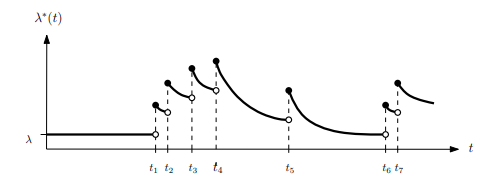

### Нейросетевые модели

#### Классический временной ряд

В основном данные синхронны, с одинаковой задержкой

Данные могут быть представлены в виде последовательности значений $\{\mathbf{x}_i\}_{i=1}^N$I c заданным временным лагом $\Delta t$.

Нейронные сети:
- Рекуррентные нейронные сети (RNN, LSTM, GRU)
    
     Плюсы:
    
     - Улавливают временные зависимости
    
     Минусы:
    
     - Стремление поймать долгосрочные зависимости
     - Борьба с исчезновением градиента
     - Не могут быть распараллеленны

- CNN для временных рядов
    
     Плюсы:
    
     - Могут быть распараллеленны
     - Лучше фиксирует долгосрочные зависимости
    
     Минусы:
    
     - Принудительно применяют ненужные зависимости

- Трансформеры
    
     Плюсы:
    
     - Могут быть распараллеленны
     - Изучают внутренние зависимости с помощью механизма внимания

#### Последовательности событий

Данные асинхронны, неодинаково запаздывают

Данные могут быть представлены в виде последовательности пар $\{(t_i,c_i)\}_{i=1}^N$, временной лаг предусмотреть нельзя и нужно учитывать время прихода.

Нейронные сети:

Должно быть похоже, однако, как можно учитывать неравные лаги?

#### Общий порядок обучения

Предположим, что мы успешно построили некоторую модель $model(\mathbf{s}) \to \lambda(t|\mathcal{H})$. Как мы можем ее тренировать?

Отрицательная логарифмическая вероятность:
$$
\mathcal{L} = -\sum_{n=1}^N\left(\sum_{i=1}^{L_n}\log \lambda_{i}^n - \int_{0}^{T_n}\lambda(t | \mathcal {H} _n) \right)
$$

Наша цель - минимизировать потери.

Что делать с интегралом?
- Интеграция Монте-Карло
   $$
  \hat{\Lambda}_{MC} = \sum_{j=2}^L(t_j - t_{j-1})\left(\frac{1}{N}\sum_{i=1}^N \lambda(u_i)\right), ~ u_i \sim Unif(t_{j-1},t_j)
  $$
- Трапециевидная интеграция
   $$
   \hat{\Lambda}_{TR} = \sum_{j=2}^L\frac{t_j - t_{j-1}}{2}\left(\lambda(t_j|\mathcal{H}_{t_j}) + \lambda(t_{j-1}|\mathcal{H}_{t_{j-1}})\right)
   $$

Интеграция по методу Монте-Карло будет более точной, но займет больше времени из-за дополнительной выборки.

Теперь у нас есть целевая функция.

Мы должны разработать модель.

#### Нейронный процесса Хоукса

https://www.researchgate.net/publication/312022942_The_Neural_Hawkes_Process_A_Neurally_Self-Modulating_Multivariate_Point_Process

Эта работа была вдохновлена моделью LSTM. Модель LSTM оказалась хорошим выбором для прогнозирования временных рядов.

**Вопрос:**
Как мы можем применить LSTM к последовательностям событий?

Основная проблема здесь в том, что LSTM был разработан для данных с равной задержкой.
В статье авторы предложили добавить эволюцию скрытых и клеточных состояний между событиями.

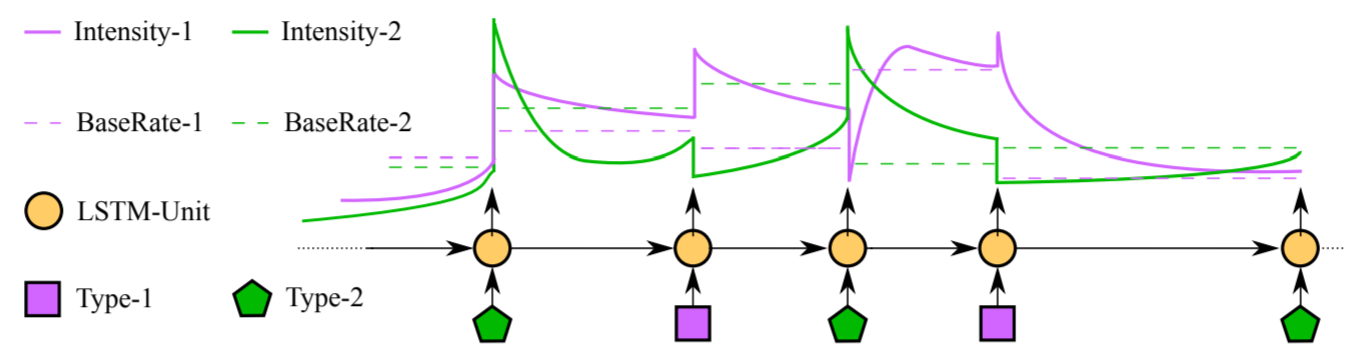

Интенсивности можно найти со скрытым состоянием, используя следующую формулу:
$$\lambda_k(t) = f_k(\mathbf{w}_k^\top \mathbf{h}(t)), ~ f_k(u) = s_k \log(1 + \exp(u/s_k))$$

Здесь k — тип события, а $f_k$ гарантирует, что результат будет больше нуля.

Архитектура LSTM аналогична исходной архитектуре LSTM, поэтому мы не будем на ней сосредотачиваться.


Давайте изучим, как именно устроена эволюция между событиями.

- Скрытое состояние зависит от состояния ячейки $\mathbf{h}(t) = \mathbf{o}_i \odot ( 2\sigma(2\mathbf{c}(t)) - 1)$
- Состояния ячеек эволюционируют в некоторое базовое состояние ячейки $\mathbf{c}(t) = \overline{\mathbf{c}}_{i+1} + (\mathbf{c}_{i+1} - \overline {\mathbf{c}}_{i+1})\exp(-\boldsymbol{\delta}_{i+1}(tt_i))$
- Если мы забудем о нелинейностях, окажется, что мы используем показатели степени в качестве базисных функций.
- Нелинейности позволяют добиться более сложного поведения
- Мы можем предсказать волнения, возбуждения и их комбинации

Посмотрим на функци. интенсивности:

$$\lambda_k(t) = g(\{(c_{i+1}^j - \overline{c}_{i+1}^j)\exp(-\delta_{i+1}^j(t-t_i)\}_{j=1}^{hidden\_size})$$

Здесь $g$ — функция, объединяющая все функции $\lambda_k$. Это позволяет нам прогнозировать огромное разнообразие моделей поведения.

- Плюсы
     - Моделирует функцию интенсивности везде
     - Учитывает неравные временные задержки
- Минусы
    
     - То же, что и для классического LSTM

#### Трансформер Хоукса

https://arxiv.org/pdf/2002.09291.pdf

- Трансформер - это современное решение для задач seq2seq.
- Трансформеры могут эффективно улавливать долгосрочные зависимости
- Трансформаторы могут быть параллельны
- Они не предназначены для временных точечных процессов...

Можно использовать эмбеддинги для типов событий, и оно будет работать с преобразователями. Но что нам делать со временем прибытия?

**Решение**

Временное кодирование $(i\in\{1,\dots,M\})$

$$
[\mathbf{z}(t_j)]_i = \begin{cases}cos(t_j/10000^{\frac{i-1}{M}}), ~ \text{if} ~ i~\text{is odd}\\sin(t_j/10000^{i/M}), ~ \text{if} ~ i~\text{is even}\end{cases}
$$

Кодирование событий

$$
\mathbf{e}_j = \mathbf{U}\mathbf{c}_j
$$

$\mathbf{c}_j$ is an event one-hot encoding, $\mathbf{U}\in\mathbb{R}^{M\times C}$. $\mathbf{C} = [\mathbf{c}_1,\dots,\mathbf{c}_L]\in\mathbb{R}^{K\times L}$

Вход трансформатора будет следующим:

$$
\mathbf{X} = (\mathbf{U}\mathbf{C} + \mathbf{Z})^{\top}
$$


**Архитектура**

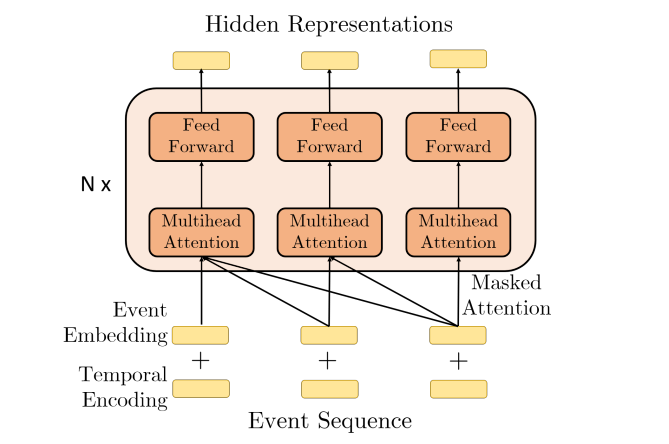

**Напоминание**
    
Механизм внимания:
    
$$
    \mathbf{S} = \mathrm{Softmax}\left(\frac{\mathbf{Q}\mathbf{K}^{\top}}{\sqrt{M_K}}\right)\mathbf{V}
$$
    
$$
    \mathbf{Q} = \mathbf{X}\mathbf{W}^Q,~\mathbf{K} =\mathbf{X}\mathbf{W}^K,~\mathbf{V}=\mathbf{X}\mathbf{W}^V
$$
    
$$
    \mathbf{W}^Q,\mathbf{W}^K\in\mathbb{R}^{M\times M_{K}},~\mathbf{W}^V\in \mathbb{R}^{M\times M_V}
$$
    
Multihead Attention: $\mathbf{S}_1,\dots,\mathbf{S}_H$.
    
Выход мезанизма внимания:
    
$$
    \mathbf{S} = [\mathbf{S}_1,\dots,\mathbf{S}_H]\mathbf{W}^O, ~ \mathbf{W}^O\in\mathbb{R}^{HM_V\times M}
$$
    
За механизмом вниманя следует нейронная сеть с прямой связью по положению, состоящая из двух линейных слоев. Результирующая матрица$\mathbf{H}\in\mathbb{R}^{L\times M}$.
    
Авторы избегают заглядывания в будущее, используя маскированное внимание.

Теперь, когда мы успешно внедрили модель трансформатора, которая может обрабатывать последовательности событий, как мы можем предсказать интенсивность?

В статье авторы предложили следующее решение:

$$
\lambda_k(t|\mathcal{H}_t) = f_k\left(\alpha_k\frac{t-t_j}{t_j} + \mathbf{w}_k^{\top}\mathbf{h}(t_j) + b_k\right),~t\in[t_j,t_{j+1})\\f_k(u) = s_k\log(1+\exp(u/s_k))
$$

Условия:

- $\alpha_k\frac{t-t_j}{t_j}$ - интерполяция текущего влияния между наблюдаемыми временными метками $t_j$ и $t_{j+1}$
- $\mathbf{w}_k^{\top}\mathbf{h}(t_j)$ - исторический термин
- $b_k$ - базовая интенсивность

Учитывая эту интенсивность, можно найти ожидаемое время прибытия и тип события следующим образом:

$$
p(t|\mathcal{H}_t) = \lambda(t|\mathcal{H}_t)\exp\left(-\int_{t_j}^t\lambda(\tau|\mathcal{H}_{\tau})d\tau\right)\\\hat{t}_{j+1} = \int_{t_j}^{+\infty}tp(t|\mathcal{H}_t)dt\\ \hat{c}_{j+1} = \arg\max_c \frac{\lambda_c(t_{j+1}|\mathcal{H}_{j+1})}{\lambda(t_{j+1}|\mathcal{H}_{j+1})}
$$

## Примеры

### Вопрос: Можете ли вы предложить примеры реальных задач, которые можно решить с помощью моделирования процесса Пуассона?

- Поток космических частиц
- Очередь (например, количество обслуженных людей)
- Количество автомобилей, проезжающих через перекресток
- Отказы машин или оборудования

### Пример с очередью


#### Вопрос: Предположим, у нас есть кассир и очередь. Мы можем описать это как два точечных процесса - приход людей и обслуживание людей. Какой из процессов мы можем описать как процесс Пуассона?



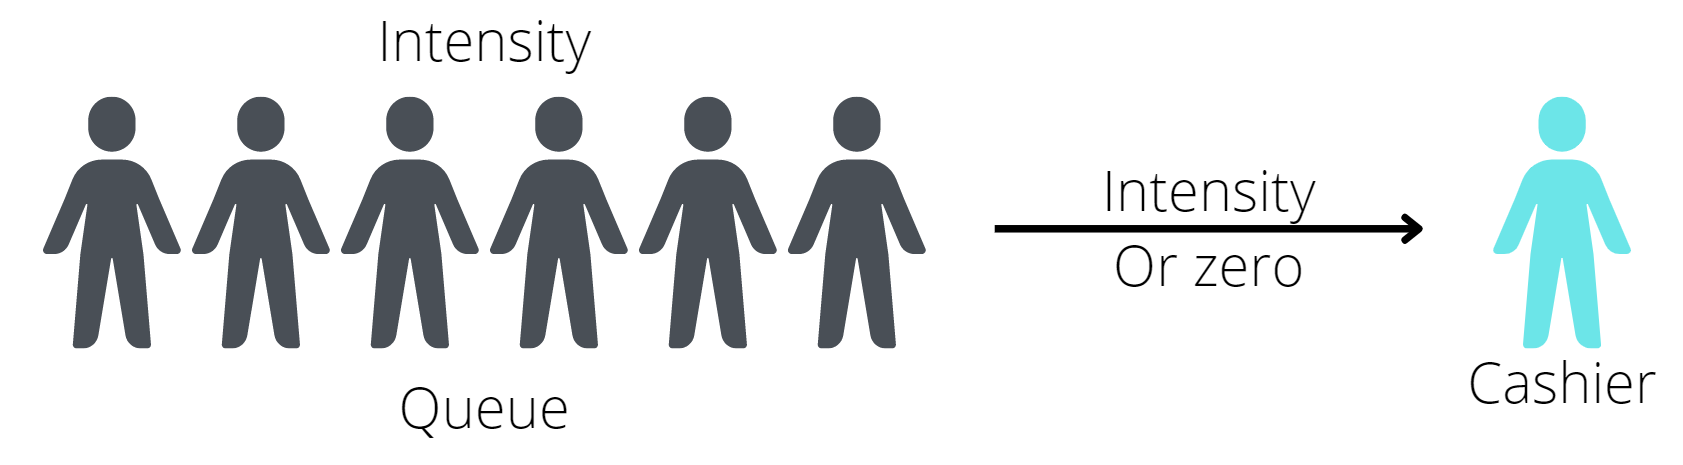

Приход людей можно описать с помощью интенсивности процесса Пуассона. Можно подумать, что мы также можем определить интенсивность обслуживания людей. Однако, что произойдет, если в очереди не будет людей? В этом случае мы не сможем иметь новых обслуженных людей.

Таким образом, мы можем описать эту модель следующим образом.


- $\lambda_q(t)$ - интенсивность очереди
- $\lambda_c(t|\text{queue})=\lambda_c(t) \times (\#\text{[queue]} > 0)$

Однако, локально оба процесса можно описать как процессы Пуассона.

### Пример с отказом машин

Для прогнозирования отказов машин мы можем начать с простого процесса Пуассона, предполагая, что отказы происходят случайно. Этот метод прост и полезен, когда у нас нет подробных данных.

Для более точных прогнозов мы можем использовать модель пропорциональных рисков Кокса. Эта модель, лучше подходящая для анализа выживаемости, учитывает дополнительные переменные, такие как возраст машины и история обслуживания, предлагая более тонкий прогноз.

Формула
$$\lambda_{PH} = \lambda_0(t) \exp(-x^\top \beta)$$
в модели Кокса отражает, как эти переменные влияют на риск отказа со временем. Если подробные данные недоступны, процесс Пуассона служит базовой, начальной моделью.

### Вопрос: Можете ли вы предложить примеры реальных задач, где мы ожидаем, что процесс будет являться процессом Хокса?



1. Динамика ретвитов в социальных сетях, например, в Twitter. Когда кто-то делает ретвит, это увеличивает вероятность дополнительных действий, таких как лайки или комментарии. Однако со временем эта вероятность уменьшается. Исследование на эту тему: [Retweet Dynamics (Koboyashi et.al. 2016)](https://www.aaai.org/ocs/index.php/ICWSM/ICWSM16/paper/view/13026/12739).

2. Динамика фьючерсных контрактов на финансовом рынке. В этой сфере активность одного участника рынка может повышать вероятность реакций других участников. Ссылка на исследование: [Financial Market Futures Contracts (Hardiman et.al. 2013)](https://link.springer.com/content/pdf/10.1140/epjb/e2013-40107-3.pdf).

3. Распространение Covid-19. Процесс Хокса может описывать, как инфекция передается от одного человека к другому, увеличивая вероятность новых случаев заражения после каждого зарегистрированного случая. Соответствующее исследование: [Covid-19 Spread (Garetto et.al. 2021)](https://www.sciencedirect.com/science/article/pii/S1367578821000080).

Эти примеры демонстрируют, как процесс Хокса может быть применен для моделирования событий, где одно событие повышает вероятность следующего в течение определенного времени, создавая своеобразную цепную реакцию.

### Резюме примеров

- Зависимости в последовательностях событий обычно сложнее простого процесса Пуассона.
- Процесс Пуассона представляет собой хорошее начальное приближение.
- Многие локальные задачи могут быть смоделированы с использованием модели процесса Пуассона.
- Процесс Хоукса является эффективным следующим этапом в моделировании, позволяющим успешно описывать реальные проблемы с учетом более сложных взаимосвязей в последовательностях событий.
- Использование нейронных сетей может дополнительно улучшить моделирование, внося способность обучения и адаптации к сложным шаблонам данных, что особенно полезно в сценариях с большим объемом и высокой изменчивостью данных.

## Теоретические Задачи

### Распределение Пуассона

#### Вопрос: Что такое Распределение Пуассона?



Это дискретное вероятностное распределение с следующей функцией массы вероятности (PMF):

$$ p(k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

где $ k \in \mathbb{Z}_{0+}$.



#### Вопрос: Как связано Распределение Пуассона с Процессом Пуассона?



Функция подсчета событий в Процессе Пуассона может быть описана с помощью Распределения Пуассона.

Рассмотрим Однородный Процесс Пуассона с функцией интенсивности $ \lambda(t) = \lambda $. В этом случае:

$$ p(N(t) = k) = \frac{(\lambda t)^k e^{-\lambda t}}{k!} $$

Позднее мы также покажем, что Распределение Пуассона связано и с Неоднородным Процессом Пуассона.

### Функции для Пуассоновского процесса

#### Вопрос: Какие функции могут быть использованы, чтобы описать точечный процесс?


- Интенсивность
- Плотность вероятности
- Функция выживания

#### Задача: Показать, используя определения, как все функции связаны друг с другом, исходя из функции интенсивности $ \lambda(t) $.

Пусть T - это случайная величина времени прибытия.

Исходя из определений:

- Функция интенсивности: $ \lambda(t) dt = p(T \in [t; t+dt) | T \geq t) $
- Функция плотности вероятности: $ f(t) dt = p(T \in [t; t+dt)) $
- Функция выживания: $ S(t) = p(T \geq t) $

$$
\lambda(t) = p(T \in [t; t+dt) | T \geq t) = \frac{p(T \geq t | T \in [t; t+dt)) \cdot p(T \in [t; t+dt))}{p(T \geq t)} = \frac{1 \times p(T \in [t; t+dt))}{p(T \geq t)} = \frac{f(t)}{S(t)}
$$

$$
S(t) = p(T \geq t) = \int_{t}^{+\infty} f(z) dz
$$
$$
\frac{dS(t)}{dt} = -f(t)
$$

Теперь найдем функцию выживания, решая следующее дифференциальное уравнение:

$$
\frac{dS}{dt} = -S \lambda(t)
$$
$$
\frac{dS}{S} = -\lambda(t) dt
$$
$$
S(t) = Ce^{-\int_{0}^t \lambda(z) dz}
$$

Константу можно найти из условия, что $ S(0) = 1 $, так что $ C = 1 $.

Таким образом, функция плотности вероятности может быть записана следующим образом:
$$
f(t) = \lambda(t) e^{-\int_{0}^{t} \lambda(z) dz}
$$

**Итог:**
- $ \lambda(t) = \frac{f(t)}{S(t)} $
- $ f(t) = \lambda(t) e^{-\int_{0}^t \lambda(z) dz} $
- $ S(t) = e^{-\int_{0}^t \lambda(z) dz} $

### Правдоподобие

#### Вопрос: Как мы можем оптимизировать модель, когда работаем со стохастическим процессом?

Мы должны максимизировать правдоподобие - плотность вероятности датасета относительно параметров модели по этим параметрам.

#### Задача: Дан временной точечный процесс и его функции интенсивности $\lambda_c(t),~c\in\mathcal{C}$, и последовательность событий $s$, найти функцию плотности вероятности для этой последовательности событий $p_{\lambda}(s)$.

*Подсказка: Используйте правило цепи и найдите плотность вероятности для каждого события, используя функцию распределения (CDF).*

*Примечание: Если хотите, можете рассмотреть только один тип событий, $|\mathcal{C}| = 1$.*

Пусть $s=\{(t_i,c_i)\}_{i=1}^N$ - последовательность событий, $\mathcal{H}_i = \{(t_j,c_j)\}_{j=1}^{i-1}$ - история $i$-го события.

Мы хотим найти:

$$
p_{\lambda}(s) = p_{\lambda}((t_N,c_N)|\mathcal{H}_N)p_{\lambda}(\mathcal{H}_N) = \prod_{i}p_{\lambda}((t_i,c_i)|\mathcal{H}_i)
$$

Пусть $T_i$ - случайная переменная времени $i$-го события.

Найдем плотность вероятности для каждого из событий. Пусть $T_i$ - случайная переменная $i$-го типа события, $T_i > t_{i-1}$.

Найдем функцию распределения этой случайной переменной:

$$
F_i(t) = P(T_i \leq t) = 1 - P(T_i > t) = 1 - P(\Delta N(t_{i-1}, t) = 0) = 1 - \exp \left(-\int_{t_{i-1}}^t \lambda(u) du\right)
$$

Тот факт, что $P(\Delta N(t_1,t_2) = 0) = \exp\left(-\int_{t_1}^{t_2} \lambda(u)du\right)$, легко виден, если начать наблюдение с $t_1$. В этом случае $P(\Delta N(t_1,t_2) = 0)$ является функцией выживания, которую мы нашли в предыдущей задаче.

Пусть $\Lambda(t) = \int_{0}^t \lambda(u)du$, $\lambda(t) = \sum_{c=1}^C \lambda_{c}(t)$. Найдем плотность вероятности для $T_i$:

$$
p_{\lambda}(t_i|\mathcal{H}_i) = \exp(\Lambda(t_{i-1}) - \Lambda(t_i))\lambda(t_i)
$$

Пусть $C_i$ - случайная переменная, показывающая тип события. Тогда

$$
p((t_i,c_i)|\mathcal{H}_i) = p(c_i|t_i, \mathcal{H}_i)p(t_i|\mathcal{H}_i)
$$

$$
p(C_i = c_i|t_i,\mathcal{H}_i) = \frac{\lambda_{c_i}(t_i)}{\lambda(t_i)}
$$

Таким образом, вероятность может быть записана как

$$
p_{\lambda}(s)=\prod_{i=1}^N\left[ \lambda_{c_i}(t_i)\right]\exp(-\int_{t=0}^T \lambda(t)dt)
$$

Обратите внимание, что мы не использовали тот факт, что наша функция интенсивности не зависит от истории, так что эта формула применима ко всем задачам с измеримой функцией интенсивности.

### Неоднородный Процесс Пуассона и рапределение

Теперь, когда мы нашли плотность вероятности точечного процесса, мы можем показать, как пуассоновский процесс связан с пуассоновским распределением

#### Задача: Исходя из функции интенсивности $\lambda(t)$, доказать, что для функции подсчета $N(t)$ распределение вероятностей $p(N(t))$ соответствует распределению Пуассона с параметром $\int_{0}^t \lambda(u)du$.

*Примечание: Если $X\sim Poisson(\Lambda)$, то $P(X = n) = \frac{\Lambda^n}{n!}e^{-\Lambda}$.*

Пусть $s = \{t_i\}_{i=1}^N$ - это реализация процесса Пуассона.

Пусть $|s| = 0$, то есть $s$ не содержит событий, тогда

$$
P(N(t) = 0) = p_{\lambda}(s) = \exp\left(-\int_0^t\lambda(u)du\right)=\frac{\Lambda^0}{0!}e^{-\Lambda}
$$

Здесь $\Lambda = \int_{0}^t \lambda(u)du$

Пусть $|s| = 1$

$$
P(N(t) = 1) = \int_{t_1 = 0}^t dt_1 \lambda(t_1)e^{-\int_{0}^t\lambda(u)du} =\\= \frac{\Lambda^1}{1!}e^{-\Lambda}
$$

Пусть $|s|=n$, мы используем факт, что события независимы

$$
P(N(t) = n) = \frac{1}{n!}\int_{t_1,\dots,t_n=0}^t dt_1\dots dt_n \lambda(t_1)\dots\lambda(t_n) e^{-\int_{0}^{t}\lambda(u)du}=\\=\frac{\Lambda^n}{n!}e^{-\Lambda}
$$

Здесь мы делим на $n!$, так как порядок событий не имеет значения.

### Оптимизация модели и логарифм правдоподобия

Как вы можете помнить, функцию плотности вероятности точечного процесса можно записать следующим образом:

$$
p_{\lambda}(s)=\prod_{i=1}^N\left[ \lambda_{c_i}(t_i)\right]\exp\left(-\int_{t=0}^T \lambda(t)dt\right)
$$

Теперь предположим, что у нас есть набор данных $ S = \{s_i\}_{i=1}^N $. Все эти последовательности были сгенерированы одним точечным процессом с соответствующей функцией интенсивности. Допустим, что мы можем определить эту функцию с помощью некоторых параметров модели $ \theta $. Тогда функция правдоподобия будет:

$$
L_{\theta} = \prod_{i=1}^N\prod_{j=1}^{L_i}\left[\lambda_{c_{ij}}(t_{ij})\right]\exp\left(-\int_{0}^{T_i}\lambda(t) dt\right)
$$

Однако оптимизация функции правдоподобия не очень удобна из-за умножения. Лучше оптимизировать логарифмическую функцию правдоподобия.

$$
\mathcal{L} = \sum_{i=1}^N\left(\sum_{j=1}^{L_i}\log\lambda_{c_{ij}}(t_{ij}) - \int_{0}^{T_i}\lambda(t) dt\right)
$$

Это представляет собой более удобный для анализа и оптимизации подход в контексте статистического моделирования и анализа данных.

#### Задача: Дан набор данных $\mathbf{S} = \{\mathbf{s}_n\}_{n=1}^N$, где $\mathbf{s}_n = \{(t_{i},c_{i})\}_{i=1}^{L_n}$, сгенерированный с помощью однородного процесса Пуассона. Найти параметр процесса Пуассона $\lambda$.



$$
\mathcal{L} = - \sum_{n=1}^N\sum_{i=1}^{L_n}\log \lambda - \lambda T_{n} = - \lambda \sum_{n=1}^N T_n - \log(\lambda)\sum_{n=1}^N L_n
$$

Мы хотим минимизировать потери. Минимум будет достигнут, когда

$$
\sum_n T_n - \frac{1}{\lambda} \sum_n L_n = 0
$$
$$
\lambda = \frac{\sum_n L_n}{\sum_n T_n}
$$

**Примечание**
Это решение представляет определение интенсивности. Решение будет таким же, как если мы объединим все последовательности. В этом случае можно интерпретировать интенсивность как наклон функции подсчета во времени.

### Предсказания модели



Для чего нам модели, если мы не можем использовать их для прогнозирования чего-то полезного? Одной из задач моделирования последовательностей событий является прогнозирование времени возврата.

Для прогнозирования времени возврата нужно рассчитать следующее матожидание:
$$
\hat{t} = \mathbb{E}_{\lambda}t = \int_{0}^{+\infty} t f(t|s) dt
$$

Давайте попробуем это для процессов Пуассона и Хоукса.



#### Задача: Дана функция интенсивности $\lambda^*(t) = \lambda$. Найти время возврата.



Сначала вспомним функцию плотности вероятности точечного процесса:

$$
f(t|s) = \lambda^*(t) e^{-\int_{t_{i-1}}^{t} \lambda^{*}(t) dt}
$$

В нашем случае:

$$
f(t|s) = \lambda e^{-\lambda t}
$$

Тогда ожидаемое время возврата равно:
$$
\Delta t = \int_{0}^{+\infty} \lambda t e^{-\lambda t} dt = \frac{1}{\lambda} \int_{0}^{+\infty} xe^{-x} dx = \frac{1}{\lambda}
$$

#### Задача: Исходя из функции интенсивности $\lambda^*(t) = \mu + a \sum_{j: t_j < t} e^{-\delta (t-t_j)}$ и последовательности $s = \{t_{j}\}_{j=1}^{i-1}$, определить время возврата.

Сначала вспомним функцию плотности вероятности точечного процесса:

$$
f(t|s) = \lambda^*(t) e^{-\int_{t_{i-1}}^{t} \lambda^{*}(t) dt}
$$

Нам нужно найти время возврата $\Delta t = t - t_{i-1}$, тогда:

$$
f(\Delta t|s) = \lambda^{*}(t_{i-1} + \Delta t) e^{-\int_{0}^{\Delta t}\lambda^*(t_{i-1} + \tau)d \tau}
$$

Обозначим:

$$
\Lambda(\Delta t) = \int_{0}^{\Delta t}\lambda^{*}(t_{i-1} + \tau) d \tau
$$

Тогда

$$
f(\Delta t|s) = \frac{\partial\Lambda}{\partial \Delta t}e^{-\Lambda}
$$

Ожидаемое время возврата можно найти следующим образом:

$$
\mathbb{E}[\Delta t] = \int_{0}^{+\infty}\Delta t \frac{\partial\Lambda}{\partial \Delta t}e^{-\Lambda} d\Delta t = -\int \Delta t d e^{-\Lambda} = \\
=-\Delta t e^{-\Lambda}|_{0}^{+\infty} + \int_{0}^{+\infty}e^{-\Lambda} d\Delta t = \int_{0}^{+\infty}e^{-\Lambda}d\Delta t
$$

Теперь давайте вычислим интеграл $\Lambda$:
$$
\Lambda = \int_{t_{i-1}}^{t} (\mu + a \sum_{j: t_j < \tau} e^{-\delta (\tau-t_j)}) d\tau = \mu (t-t_{i-1}) - \frac{a}{\delta} \sum_j (e^{-\delta(t-t_j)} - e^{-\delta(t_{i-1}-t_j)}) =\\= \mu \Delta t - \frac{a}{\delta}(e^{-\delta \Delta t} - 1)\sum_j e^{-\delta (t_{i-1} - t_j)}
$$

Таким образом, ожидаемое время возврата можно записать следующим образом:

$$
\mathbb{E}[\Delta t] = \int_{0}^{+\infty}e^{-\mu \Delta t}e^{-\frac{a}{\delta}(1-e^{-\delta \Delta t})\sum_{j}e^{-\delta(t_{i-1}-t_{j})}} d \Delta t
$$

Обозначим $z = e^{-\delta \Delta t}$, тогда $\Delta t = - \frac{1}{\delta} \log (z)$. Тогда:

$$
\mathbb{E}[\Delta t] = \frac{1}{\delta} \int_{0}^{1} z^{\frac{\mu}{\delta} - 1}e^{-\frac{a}{\delta} (1-z) \sum_j e^{-\delta (t_{i-1}-t_j)}} dz
$$

Обозначим $\alpha = \frac{\mu}{\delta}$ и $\beta = - \frac{a}{\delta}\sum_j e^{-\delta(t_{i-1} - t_j)}$, тогда:

$$
\mathbb{E}[\Delta t] = \frac{1}{\delta}\int_{0}^1 z^{\alpha - 1} e^{\beta (1-z)} dz
$$

Как можно заметить, даже для этой простой экспоненциальной формы полученная функция не может быть записана в закрытом виде. Для более сложных законов интенсивности вычисление времени возврата может быть еще более сложной задачей. Таким образом, чтобы предсказать время возврата, можно использовать либо эмпирические подходы, например, генерировать множество точек и вычислять среднее значение, либо применять дополнительные модели поверх генеративных. Последнее решение распространено для нейронных сетей, когда интеграл не может быть обработан напрямую, и мы используем вложения (embeddings) для предсказания чего-либо на их основе.

## Синтетические эксперименты

### Генерация однородного пуассоновского процесса

#### Вопрос: Как мы можем сгенерировать однородный пуассоновский процесс?

- С использованием функции CDF и метода обратного преобразования сгенерировать следующее событие. Продолжайте столько раз, сколько нужно.
- Воспользоваться тем фактом, что функция подсчета событий может быть описана распределением Пуассона. Выбрать временной интервал, сгеренировать количество событий и случайным образом разместить их в этом интервале.

#### Задача: Сгенерировать последовательнсть для однородного пуассоновского процесса, используя ```torch.rand``` и ```torch.poisson```.

In [ ]:
import torch
import torch.nn as nn
torch.random.manual_seed(12)

# code here

T = 10
lambda_ = 10
poisson_lambda = lambda_ * T

N = torch.poisson(torch.Tensor([poisson_lambda])).long()[0]
seq, _ = torch.sort(torch.rand((N,)) * T)

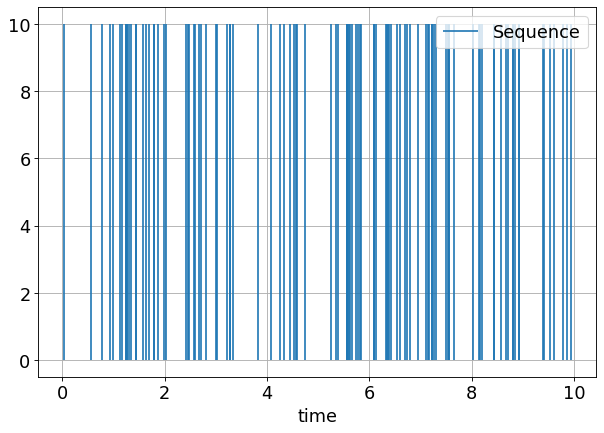

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6), dpi=80)
plt.vlines(x=seq, ymin=0, ymax=10, label = 'Sequence')
plt.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1,1))
plt.xlabel("time", fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

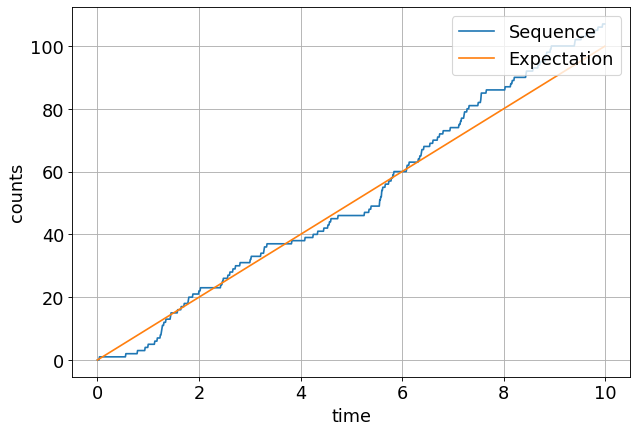

In [ ]:
times = torch.arange(0,10,0.01)
counts = torch.Tensor([torch.sum(seq<=t) for t in times])
expected = lambda_ * times

plt.figure(figsize=(9, 6), dpi=80)
plt.plot(times, counts, label = 'Sequence')
plt.plot(times, expected, label = 'Expectation')
plt.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1,1))
plt.xlabel("time", fontsize=16)
plt.ylabel("counts", fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Эмпирические распределения однородного пуассоновского процесса

#### Задача: Построить империческую PDF против истинной PDF и эмпиричиескую функцию Выживания против истинной функция Выживания.

In [ ]:
# let's generate sequence
T = 10000
lambda_ = 10
poisson_lambda = lambda_ * T

N = torch.poisson(torch.Tensor([poisson_lambda])).long()[0]
seq, _ = torch.sort(torch.rand((N,)) * T)

In [ ]:
# let's compute return time
return_time = seq[1:] - seq[:-1]

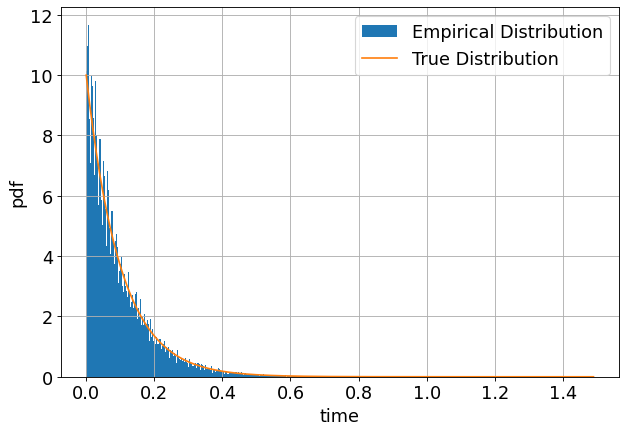

In [ ]:
times = torch.arange(0,1.5,0.01)
pdf = lambda_*torch.exp(-lambda_*times)

plt.figure(figsize=(9, 6), dpi=80)
plt.hist(return_time, bins=1000, density=True, label="Empirical Distribution")
plt.plot(times, pdf, label="True Distribution")
plt.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1,1))
plt.xlabel("time", fontsize=16)
plt.ylabel("pdf", fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

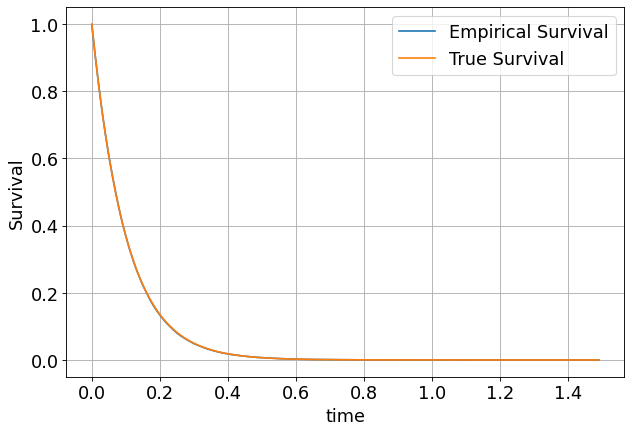

In [ ]:
times = torch.arange(0,1.5,0.01)
survival = torch.Tensor([torch.sum(return_time>t)/len(seq) for t in times])
true_survival = torch.exp(-lambda_*times)

plt.figure(figsize=(9, 6), dpi=80)
plt.plot(times, survival, label="Empirical Survival")
plt.plot(times, true_survival, label="True Survival")
plt.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1,1))
plt.xlabel("time", fontsize=16)
plt.ylabel("Survival", fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Предсказания с помощью однородного пуассоновского процесса

#### Задача: Проверить, как ошибка в предсказании интенсивности зависит от количества событий.

In [ ]:
number_of_events = []
error = []

lambda_ = 10

for t in torch.arange(0.1,1000, 0.1):
  poisson_lambda = lambda_ * t

  N = torch.poisson(torch.Tensor([poisson_lambda])).long()[0]
  seq, _ = torch.sort(torch.rand((N,)) * t)
  pred_lambda = len(seq)/t

  number_of_events.append(len(seq))
  error.append(abs(pred_lambda - lambda_))

number_of_events = torch.Tensor(number_of_events)
error = torch.Tensor(error)

number_of_events, ids = torch.sort(number_of_events)
error = error[ids]

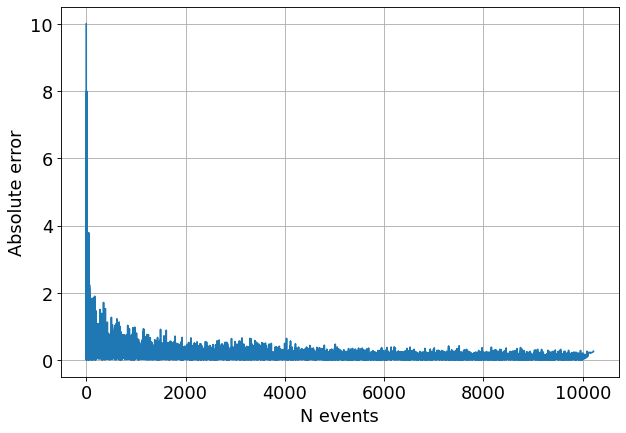

In [ ]:
plt.figure(figsize=(9, 6), dpi=80)
plt.plot(number_of_events, error)
plt.xlabel("N events", fontsize=16)
plt.ylabel("Absolute error", fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Генерация неоднородного пуассоновского процесса

Допустим, у нас есть неоднородный процесс Пуассона, и мы хотим сгенерировать последовательность из соответствующего распределения.

#### Вопрос: как мы можем провести эту выборку?



Используя алгоритм разделения (thinning algorithm).

Предположим, что мы хотим сгенерировать последовательность с неоднородным процессом Пуассона с следующей функцией интенсивности $\lambda(t)$.

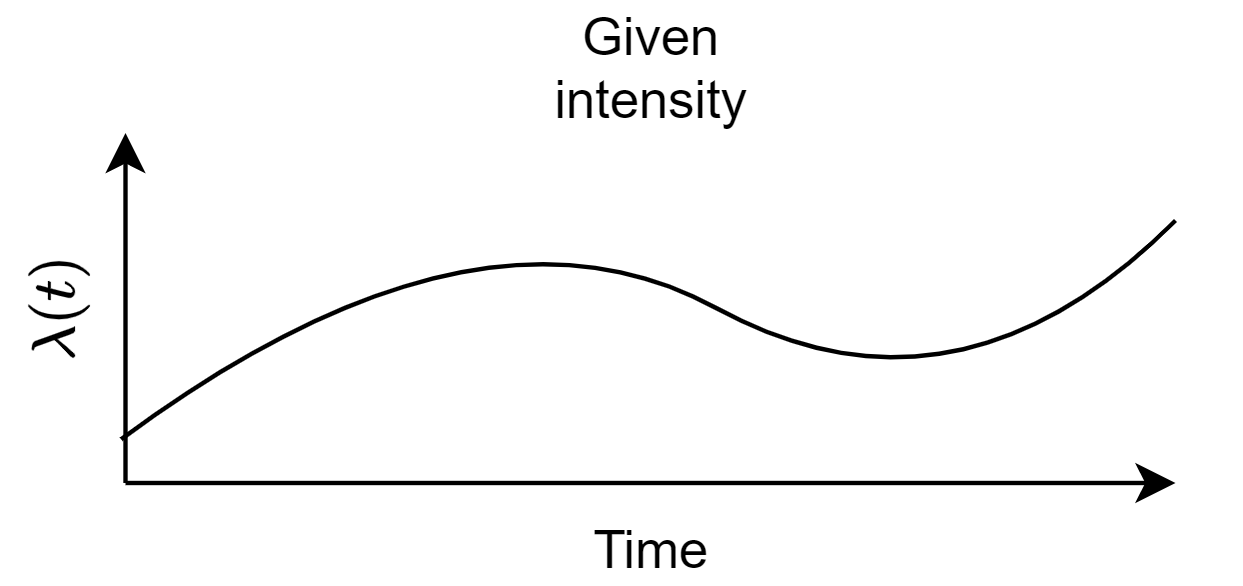

Давайте введем функцию интенсивности $\hat{\lambda}(t) = C$, такую, что $\forall t: \lambda(t) \leq C$.



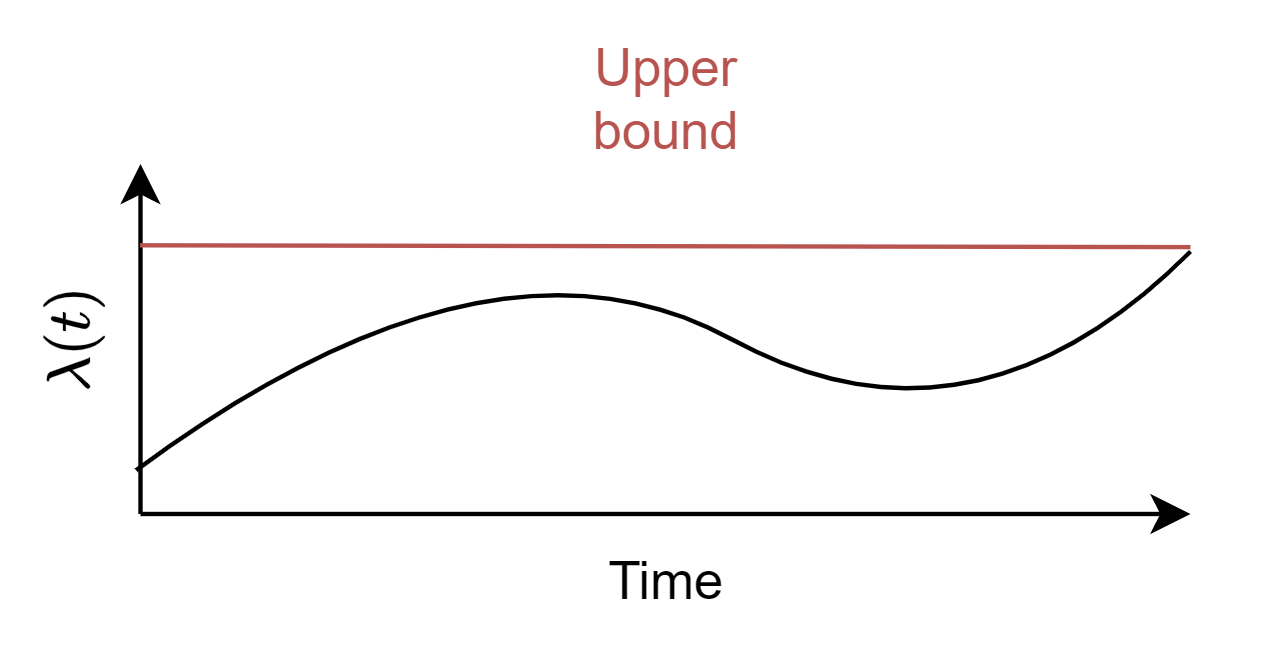

Теперь давайте введем дополнительный точечный процесс с интенсивностью $\lambda_a(t) = \hat{\lambda} - \lambda(t)$. И давайте рассмотрим двух типов однородный пуассоновский процесс. И давайте сгенерируем последовательность.



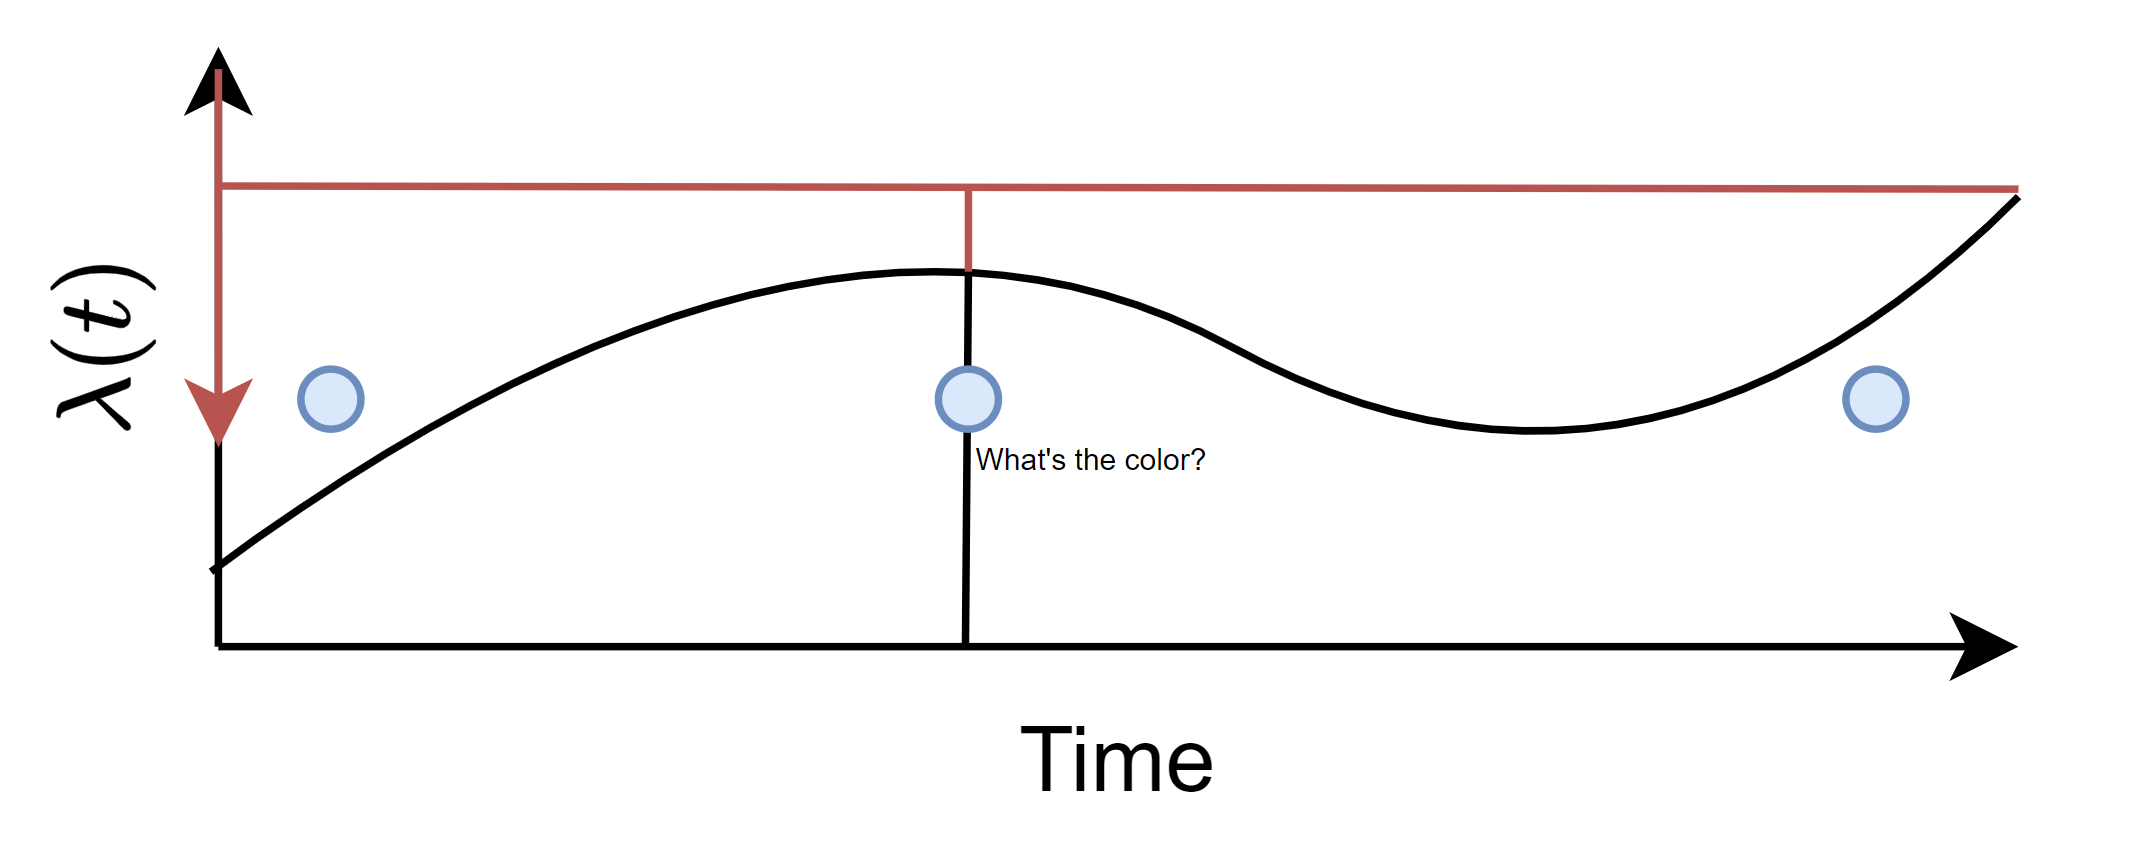

Поскольку эти два подпроцесса с интенсивностью $\lambda(t)$ и $\lambda_a(t)$ независимы, вместе они будут представлять собой однородный пуассоновский процесс с функцией интенсивности, равной их сумме. Вопрос заключается в том, как мы можем определить, было ли событие сгенерировано с использованием $\lambda(t)$ или $\lambda_a(t)$. Интенсивность показывает частоту. Поэтому мы можем определить вероятность того, что данная точка была сгенерирована с использованием $\lambda(t)$ как $\lambda(t)/\hat{\lambda}$.

#### Задача: Используя только ```torch.rand``` и ```torch.poisson``` в качестве случайных генераторов сгенерировать последовательность для интенсивности $\lambda(t) = 5 (1+\sin(t))$, $t\in[0,10]$.

In [ ]:
import torch
import torch.nn as nn
torch.random.manual_seed(12)

# true intensity
lambda_true = lambda t: 5 * (1 + torch.sin(t))

# code here

T = 10
lambda_hat = 10
poisson_lambda = lambda_hat * T

N_hat = torch.poisson(torch.Tensor([poisson_lambda])).long()[0]
auxiliar_seq, _ = torch.sort(torch.rand((N_hat,)) * T)

probas = lambda_true(auxiliar_seq)/lambda_hat
indices = (probas > torch.rand((N_hat,)))

seq = auxiliar_seq[indices]# output, do not change the name of this variable

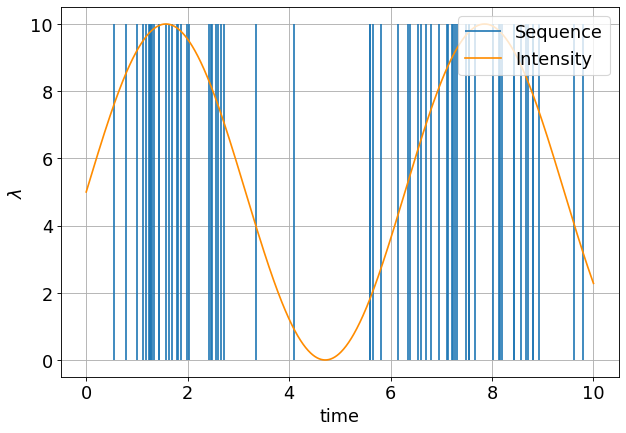

In [ ]:
import matplotlib.pyplot as plt

times = torch.linspace(0,10,1000)
lambdas = lambda_true(times)

plt.figure(figsize=(9, 6), dpi=80)
plt.vlines(x=seq, ymin=0, ymax=10, label = 'Sequence')
plt.plot(times, lambdas, label = 'Intensity', color='darkorange')
plt.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1,1))
plt.xlabel("time", fontsize=16)
plt.ylabel("$\lambda$", fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Генерация процесса Хоукса

#### Вопрос: Как мы можем сгенерировать последовательность для Процесса Хоукса?

Последовательно, имея функцию интенсивности $\lambda(t|\mathcal{H}_{i-1})$, мы генерируем последовательность, используя алгоритм разделения (thinning algorithm), берем первую точку и добавляем ее в последовательность процесса Хоукса $\mathcal{H}_{i-1} += \{t_i, c_i\}$, затем повторяем процесс.

#### Задача: Допустим, у нас есть процесс Хоукса с экспоненциальным ядром убывания и одним типом события $\lambda^*(t) = 1 + \sum_{i: t_i<t}5\exp(-15(t-t_i))$. Сгенерируйте последовательность с соответствующим законом интенсивности. Реализуйте класс процесса Хоукса.

In [ ]:
import torch

class Hawkes:
  def __init__(self, mu, a, delta):
    self.mu = mu
    self.a = a
    self.delta = delta

  def intensity(self, t, seq, in_point = False):
    """
    Returns intensity function in the momemt of time t given the sequence
    If in_point is true change the inequality from t_i < t to t_i <= t, this will be useful for sequence generation
    """
    # code here

  def generate_next_point(self, seq):
    """
    Generates the next event in the sequence
    """
    # code here, you can use the code from the previous seminar for Nonhomogeneous Poisson

  def generate_sequence(self, max_time = None, max_jumps = None):
    """
    Generates one Hawkes Process sequence, limits the sequence with either max_jumps or max_time
    """
    if (max_time is None) and (max_jumps is None):
      raise Exception("Either max_time or max_jumps have to be provided")

    # code here

##### Интенсивность

In [ ]:
import torch

class Hawkes:
  def __init__(self, mu, a, delta):
    self.mu = mu
    self.a = a
    self.delta = delta

  def intensity(self, t, seq, in_point =  False):
    """
    Returns intensity function in the momemt of time t given the sequence
    If in_point is true change the inequality from t_i < t to t_i <= t, this will be useful for sequence generation
    """
    # code here
    if len(seq) > 0:
      delta_t = t - seq
      if not in_point:
        delta_t = delta_t[delta_t > 0]
      else:
        delta_t = delta_t[delta_t >= 0]
      return self.mu + torch.sum(self.a * torch.exp(- self.delta * delta_t))
    else:
      return self.mu

  def generate_next_point(self, seq):
    """
    Generates the next event in the sequence
    """
    # code here, you can use the code from the previous seminar for Nonhomogeneous Poisson

  def generate_sequence(self, max_time = None, max_jumps = None):
    """
    Generates one Hawkes Process sequence, limits the sequence with either max_jumps or max_time
    """
    if (max_time is None) and (max_jumps is None):
      raise Exception("Either max_time or max_jumps have to be provided")

    # code here

##### Генерация следующей точки

In [ ]:
import torch

class Hawkes:
  def __init__(self, mu, a, delta):
    self.mu = mu
    self.a = a
    self.delta = delta

  def intensity(self, t, seq, in_point =  False):
    """
    Returns intensity function in the momemt of time t given the sequence
    If in_point is true change the inequality from t_i < t to t_i <= t, this will be useful for sequence generation
    """
    # code here
    if len(seq) > 0:
      delta_t = t - seq
      if not in_point:
        delta_t = delta_t[delta_t > 0]
      else:
        delta_t = delta_t[delta_t >= 0]
      return self.mu + torch.sum(self.a * torch.exp(- self.delta * delta_t))
    else:
      return self.mu

  def generate_next_point(self, seq):
    """
    Generates the next event in the sequence
    """
    # code here, you can use the code from the previous seminar for Nonhomogeneous Poisson
    starting_time = 0
    N = len(seq)
    while len(seq) == N:
      if N > 0:
        lambda_hat = self.intensity(seq[-1] + starting_time, seq, True)
      else:
        lambda_hat = self.mu
      T = 100 * 1/lambda_hat
      poisson_lambda = lambda_hat * T

      N_hat = torch.poisson(torch.Tensor([poisson_lambda])).long()[0]
      auxiliar_seq, _ = torch.sort(torch.rand((N_hat,)) * T)
      if N > 0:
        auxiliar_seq += starting_time + seq[-1]
      else:
        auxiliar_seq += starting_time

      probas = torch.Tensor([self.intensity(t, seq) for t in auxiliar_seq])/lambda_hat
      indices = (probas > torch.rand((N_hat,)))

      next_seq = auxiliar_seq[indices]

      if len(next_seq) == 0:
        starting_time += T
      else:
        seq = torch.concat([seq, torch.Tensor([next_seq[0]])])

    return seq

  def generate_sequence(self, max_time = None, max_jumps = None):
    """
    Generates one Hawkes Process sequence, limits the sequence with either max_jumps or max_time
    """
    if (max_time is None) and (max_jumps is None):
      raise Exception("Either max_time or max_jumps have to be provided")

    # code here

##### Генерация последовательности

In [ ]:
import torch

class Hawkes:
  def __init__(self, mu, a, delta):
    self.mu = mu
    self.a = a
    self.delta = delta

  def intensity(self, t, seq, in_point =  False):
    """
    Returns intensity function in the momemt of time t given the sequence
    If in_point is true change the inequality from t_i < t to t_i <= t, this will be useful for sequence generation
    """
    # code here
    if len(seq) > 0:
      delta_t = t - seq
      if not in_point:
        delta_t = delta_t[delta_t > 0]
      else:
        delta_t = delta_t[delta_t >= 0]
      return self.mu + torch.sum(self.a * torch.exp(- self.delta * delta_t))
    else:
      return self.mu

  def generate_next_point(self, seq):
    """
    Generates the next event in the sequence
    """
    # code here, you can use the code from the previous seminar for Nonhomogeneous Poisson
    starting_time = 0
    N = len(seq)
    while len(seq) == N:
      if N > 0:
        lambda_hat = self.intensity(seq[-1] + starting_time, seq, True)
      else:
        lambda_hat = self.mu
      T = 100 * 1/lambda_hat
      poisson_lambda = lambda_hat * T

      N_hat = torch.poisson(torch.Tensor([poisson_lambda])).long()[0]
      auxiliar_seq, _ = torch.sort(torch.rand((N_hat,)) * T)
      if N > 0:
        auxiliar_seq += starting_time + seq[-1]
      else:
        auxiliar_seq += starting_time

      probas = torch.Tensor([self.intensity(t, seq) for t in auxiliar_seq])/lambda_hat
      indices = (probas > torch.rand((N_hat,)))

      next_seq = auxiliar_seq[indices]

      if len(next_seq) == 0:
        starting_time += T
      else:
        seq = torch.concat([seq, torch.Tensor([next_seq[0]])])

    return seq

  def generate_sequence(self, max_time = None, max_jumps = None):
    """
    Generates one Hawkes Process sequence, limits the sequence with either max_jumps or max_time
    """
    if (max_time is None) and (max_jumps is None):
      raise Exception("Either max_time or max_jumps have to be provided")

    # code here
    seq = torch.Tensor([])

    seq = self.generate_next_point(seq)

    while True:
      if max_time is not None:
        if seq[-1] > max_time:
          break
      if max_jumps is not None:
        if len(seq) > max_jumps:
          break

      seq = self.generate_next_point(seq)

    seq = seq[:-1]
    return seq


In [ ]:
model = Hawkes(1,5,15)
seq = model.generate_sequence(max_jumps = 100)

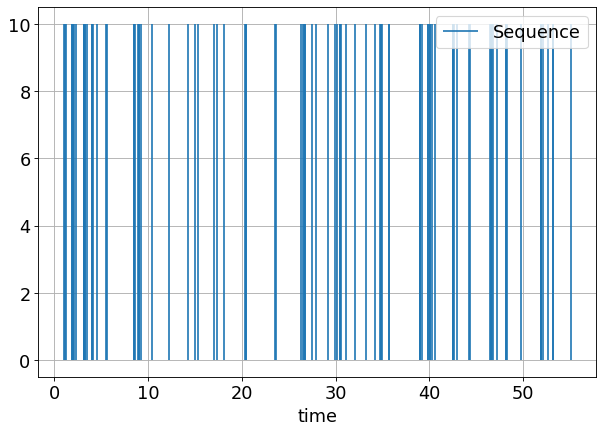

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6), dpi=80)
plt.vlines(x=seq, ymin=0, ymax=10, label = 'Sequence')
plt.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1,1))
plt.xlabel("time", fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

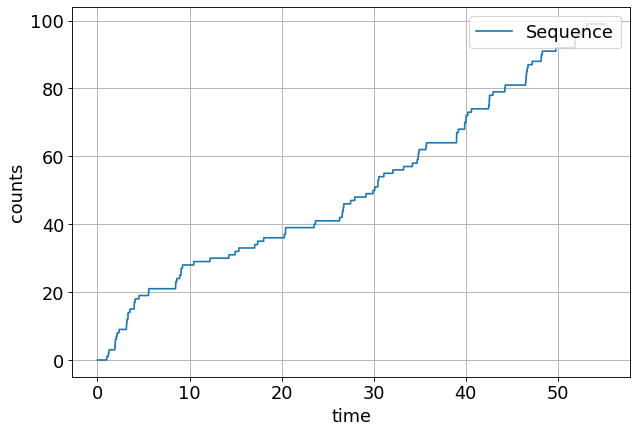

In [ ]:
times = torch.arange(0,seq[-1],0.01)
counts = torch.Tensor([torch.sum(seq<=t) for t in times])

plt.figure(figsize=(9, 6), dpi=80)
plt.plot(times, counts, label = 'Sequence')
plt.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1,1))
plt.xlabel("time", fontsize=16)
plt.ylabel("counts", fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Предсказание с помощью процесса Хоукса

#### Задача: Реализовать предсказание ожидаемого времени возврата для процесса Хоукса с экспоненциальным ядром убывания.

In [ ]:
from scipy.integrate import quad
import numpy as np

class Hawkes:
  def __init__(self, mu, a, delta):
    self.mu = mu
    self.a = a
    self.delta = delta

  def intensity(self, t, seq, in_point =  False):
    """
    Returns intensity function in the momemt of time t given the sequence
    If in_point is true change the inequality from t_i < t to t_i <= t, this will be useful for sequence generation
    """
    # code here
    if len(seq) > 0:
      delta_t = t - seq
      if not in_point:
        delta_t = delta_t[delta_t > 0]
      else:
        delta_t = delta_t[delta_t >= 0]
      return self.mu + torch.sum(self.a * torch.exp(- self.delta * delta_t))
    else:
      return self.mu

  def generate_next_point(self, seq):
    """
    Generates the next event in the sequence
    """
    # code here, you can use the code from the previous seminar for Nonhomogeneous Poisson
    starting_time = 0
    N = len(seq)
    while len(seq) == N:
      if N > 0:
        lambda_hat = self.intensity(seq[-1] + starting_time, seq, True)
      else:
        lambda_hat = self.mu
      T = 100 * 1/lambda_hat
      poisson_lambda = lambda_hat * T

      N_hat = torch.poisson(torch.Tensor([poisson_lambda])).long()[0]
      auxiliar_seq, _ = torch.sort(torch.rand((N_hat,)) * T)
      if N > 0:
        auxiliar_seq += starting_time + seq[-1]
      else:
        auxiliar_seq += starting_time

      probas = torch.Tensor([self.intensity(t, seq) for t in auxiliar_seq])/lambda_hat
      indices = (probas > torch.rand((N_hat,)))

      next_seq = auxiliar_seq[indices]

      if len(next_seq) == 0:
        starting_time += T
      else:
        seq = torch.concat([seq, torch.Tensor([next_seq[0]])])

    return seq

  def generate_sequence(self, max_time = None, max_jumps = None):
    """
    Generates one Hawkes Process sequence, limits the sequence with either max_jumps or max_time
    """
    if (max_time is None) and (max_jumps is None):
      raise Exception("Either max_time or max_jumps have to be provided")

    # code here
    seq = torch.Tensor([])

    seq = self.generate_next_point(seq)

    while True:
      if max_time is not None:
        if seq[-1] > max_time:
          break
      if max_jumps is not None:
        if len(seq) > max_jumps:
          break

      seq = self.generate_next_point(seq)

    seq = seq[:-1]
    return seq

  def return_time_prediction(self, seq):
    alpha = self.mu/self.delta
    dts = seq[-1] - seq
    beta = - float(self.a/self.delta * torch.sum(torch.exp(-self.delta*(dts))))

    def func(z, delta = self.delta, alpha = alpha, beta = beta):
      return z**(alpha - 1) * np.exp(beta * (1- z))/delta

    return quad(func, 0, 1)[0]

#### Задача: Предсказать времена возврата для нашей сгенерированной последовательности и вычислить среднюю абсолютную ошибку (MAE).

In [ ]:
model = Hawkes(10,5,15)
return_times_predicted = torch.Tensor([model.return_time_prediction(seq[:i+1]) for i in range(len(seq) - 1)])

In [ ]:
return_times = seq[1:] - seq[:-1]
MAE = torch.mean(torch.abs(return_times - return_times_predicted))
print('MAE =', MAE)

MAE = tensor(0.5010)


#### Задача: Обучить однородный пуассоновский процесс и вычислить среднюю абсолютную ошибку (MAE).

In [ ]:
lambda_pred = len(seq)/seq[-1]
print('Poisson lambda =', lambda_pred)

expected_return_time = 1/lambda_pred
MAE = torch.mean(torch.abs(return_times - expected_return_time))
print('MAE =', MAE)

Poisson lambda = tensor(1.8144)
MAE = tensor(0.5668)


### Обучение модели процесса Хоукса

#### Генерация данных

Давайте сгенерируем данные с только одним типом события и фиксированной длиной последовательности.

In [ ]:
import tqdm

seed = 42
N = 500

mu = 1.0
a = 0.35
delta = 0.7

torch.manual_seed(seed)

model = Hawkes(mu, a, delta)
dataset = [model.generate_sequence(max_jumps = 100) for i in tqdm.tqdm(range(N))]

100%|██████████| 500/500 [06:54<00:00,  1.21it/s]


In [ ]:
dataset = torch.vstack(dataset)

In [ ]:
dataset.shape

torch.Size([500, 100])

In [ ]:
dataset[0]

tensor([ 0.4062,  0.5986,  1.0175,  1.4854,  1.7008,  2.1421,  3.8565,  4.0801,
         5.0479,  5.2951,  5.4870,  6.2796,  7.5522,  7.8870, 10.2985, 10.9808,
        12.0762, 13.1100, 15.3516, 15.7684, 16.0845, 16.8279, 17.7247, 18.2505,
        18.9932, 19.5824, 19.9457, 22.0854, 22.6008, 23.6018, 23.7801, 24.8093,
        25.0384, 25.5723, 26.2714, 26.6090, 27.2119, 27.8750, 28.4265, 28.5473,
        28.9120, 29.9322, 30.2323, 33.2716, 33.8462, 34.3814, 35.2758, 35.2892,
        35.4071, 35.4792, 35.6551, 35.8517, 36.1443, 36.4270, 36.4808, 36.6886,
        36.7331, 36.9780, 37.1344, 37.2439, 37.3268, 37.3961, 37.5283, 38.6681,
        39.0927, 39.1675, 39.1770, 41.6512, 43.2759, 43.5053, 43.5406, 44.1248,
        44.3450, 44.4665, 46.2005, 47.4015, 47.5317, 48.3862, 49.0678, 49.1613,
        49.5355, 50.7786, 51.3075, 52.6951, 53.4576, 53.8352, 54.2374, 54.3051,
        54.5956, 54.7860, 54.7938, 55.0648, 55.4100, 55.6590, 55.7603, 56.0257,
        57.1403, 58.0243, 60.7103, 61.28

Для нахождения параметров процесса Хокса нам нужно минимизировать следующую отрицательную логарифмическую функцию правдоподобия:
$$
Loss = - \sum_{i=1}^{N}\left(\sum_{j=1}^{L}\log\lambda(t_{i,j}) -\int_{0}^{t_{i,L}}\lambda(u)du\right)
$$

Чаще всего эта задача решается с использованием методов максимизации ожидания (expectation maximization) или методов стохастического градиентного спуска (SGD).

Работы:
- Xu, Hongteng & Chen, Xu & Carin, Lawrence. (2018). Superposition-Assisted Stochastic Optimization for Hawkes Processes.
- Joseph, Sobin & Kashyap, Lekhapriya & Jain, Shashi. (2020). Shallow Neural Hawkes: Non-parametric kernel estimation for Hawkes processes.
- Zhang, Rui & Walder, Christian & Rizoiu, Marian-Andrei & Xie, Lexing. (2018). Efficient Non-parametric Bayesian Hawkes Processes.

Чтобы упростить задачу, давайте решим ее с использованием постоянной базы, экспоненциальных ядер и оптимизации методом стохастического градиентного спуска (SGD) для этой параметрической формы. Мы будем использовать класс ```torch.nn.Module``` для использования всех преимуществ моделей torch.

#### Задача: Перепишите функцию потерь в такой форме, чтобы ее можно было использовать при вычислениях потерь для батчей.

*Примечание: Предположите, что все последовательности имеют одинаковую длину.*

Допустим, у нас есть последовательность событий $\mathbf{s} = \{t_i\}_{i=1}^L$. Введем матрицу:
$$
\mathbf{S}_{i,j} = t_i - t_j
$$

Для данной последовательности $\mathbf{s}$ давайте найдем $\sum_{i} \log \lambda(t_i)$. Мы знаем, что $\lambda^*(t) = \mu + \sum_{i: t_i < t} a \exp(-\delta (t -t_j))$.

Пусть
$$
\mathbf{V} = \begin{pmatrix}
                    0 & 0 & 0 &\cdots & 0 \\
                    1 & 0 & 0 &\cdots & 0 \\
                    1 & 1 & 0 &\cdots & 0 \\
                    \vdots & \vdots & \vdots & \ddots & \vdots \\
                    1 & 1 & 1 & \cdots & 0\end{pmatrix} \in \mathbb{R}^{L \times L}
$$

Затем можно найти интенсивности следующим образом:
$$
\lambda(t_i) = \mu + \sum_{j} \left[\exp\left(-\delta \mathbf{S}\right) \odot (aV)\right]_{ij}
$$

Здесь $\exp$ - это поэлементное экспоненциирование, а $\odot$ - поэлементное умножение.

Теперь давайте найдем интеграл.

$$
\lambda(t) = \mu + \sum_{i: t_i < t} a\exp(-\delta(t-t_i)) = \mu + \sum_{i}a\exp(-\delta(t-t_i))\theta(t-t_i)
$$

Здесь $\theta$ - это функция Хевисайда (step function), поэтому $\theta(x) = \begin{cases}1, ~ \text{если}~x>0\\0, ~\text{иначе}\end{cases}$.
$$
\int_{0}^{t_L}\lambda(t)dt = \mu t_L - \sum_{i}\frac{a}{\delta}\exp(-\delta(t - t_i))\big{|}_{t_i}^{t_L} = \mu t_L + \sum_{i}\frac{a}{\delta}(1 - \exp(-\delta(t_L - t_i)))
$$

Затем мы должны подставить эти формулы в отрицательное логарифмическое правдоподобие.

#### Задача: Допишите недостающие части.

In [ ]:
class HawkesModel(torch.nn.Module):
  def __init__(self, L, init_mu = 0.1, init_a = 0.1, init_delta = 0.1):
    super().__init__()
    self.mu = torch.nn.Parameter(init_mu*torch.ones(1))
    self.a = torch.nn.Parameter(init_a*torch.ones(1))
    self.delta = torch.nn.Parameter(init_delta*torch.ones(1))
    self.L = L
    # code here
    self.V = torch.tril(torch.ones((L,L))) - torch.eye(L)
    self.V = self.V.unsqueeze(0)

  def forward(self, batch):
    """
    Returns loss
    Note: ideally it should predict next arrival time, however we need only to prove the concept, so no need to implement this right now
    """
    # events
    lambda_loss = - torch.sum(torch.log(self.lambdas(batch)))

    # non events
    integral_loss = self.integral(batch)

    return lambda_loss + integral_loss

  def lambdas(self, batch):
    """Returns lambda(t_{i,j}) for all i, j (do not sum, we will use this function later)"""
    # code here

  def integral(self, batch):
    """Returns integral loss (do not forget to sum)"""
    # code here

  def __str__(self):
    return "lambda = {:.3f} + sum {:.3f} * exp( - {:.3f} (t - t_i))".format(self.mu.detach().numpy()[0], self.a.detach().numpy()[0], self.delta.detach().numpy()[0])

##### Lambdas

In [ ]:
class HawkesModel(torch.nn.Module):
  def __init__(self, L, init_mu = 0.1, init_a = 0.1, init_delta = 0.1):
    super().__init__()
    self.mu = torch.nn.Parameter(init_mu*torch.ones(1))
    self.a = torch.nn.Parameter(init_a*torch.ones(1))
    self.delta = torch.nn.Parameter(init_delta*torch.ones(1))
    self.L = L
    # code here
    self.V = torch.tril(torch.ones((L,L))) - torch.eye(L)
    self.V = self.V.unsqueeze(0)

  def forward(self, batch):
    """
    Returns loss
    Note: ideally it should predict next arrival time, however we need only to prove the concept, so no need to implement this right now
    """
    # events
    lambda_loss = - torch.sum(torch.log(self.lambdas(batch)))

    # non events
    integral_loss = self.integral(batch)

    return lambda_loss + integral_loss

  def lambdas(self, batch):
    """Returns lambda(t_{i,j}) for all i, j (do not sum, we will use this function later)"""
    # code here
    S = batch.unsqueeze(2).repeat(1,1,self.L)
    S = S - S.transpose(1,2)
    lambdas = self.mu + torch.sum(torch.exp(-self.delta * S) * (self.a * self.V), dim = 2)
    return lambdas

  def integral(self, batch):
    """Returns integral loss (do not forget to sum)"""
    # code here

  def __str__(self):
    return "lambda = {:.3f} + sum {:.3f} * exp( - {:.3f} (t - t_i))".format(self.mu.detach().numpy()[0], self.a.detach().numpy()[0], self.delta.detach().numpy()[0])

##### Integral

In [ ]:
import torch

class HawkesModel(torch.nn.Module):
  def __init__(self, L, init_mu = 0.1, init_a = 0.1, init_delta = 0.1):
    super().__init__()
    self.mu = torch.nn.Parameter(init_mu*torch.ones(1))
    self.a = torch.nn.Parameter(init_a*torch.ones(1))
    self.delta = torch.nn.Parameter(init_delta*torch.ones(1))
    self.L = L
    # code here
    self.V = torch.tril(torch.ones((L,L))) - torch.eye(L)
    self.V = self.V.unsqueeze(0)

  def forward(self, batch):
    """
    Returns loss
    Note: ideally it should predict next arrival time, however we need only to prove the concept, so no need to implement this right now
    """
    # events
    lambda_loss = - torch.sum(torch.log(self.lambdas(batch)))

    # non events
    integral_loss = self.integral(batch)

    return lambda_loss + integral_loss

  def lambdas(self, batch):
    """Returns lambda(t_{i,j}) for all i, j (do not sum, we will use this function later)"""
    # code here
    S = batch.unsqueeze(2).repeat(1,1,self.L)
    S = S - S.transpose(1,2)
    lambdas = self.mu + torch.sum(torch.exp(-self.delta * S) * (self.a * self.V), dim = 2)
    return lambdas

  def integral(self, batch):
    """Returns integral loss (do not forget to sum)"""
    # code here
    base = self.mu * batch[:, -1]
    last = batch[:,-1].unsqueeze(1).repeat(1,self.L)
    exps = (self.a - self.a * torch.exp(-self.delta * (last - batch)))/self.delta

    integral_loss = torch.sum(base) + torch.sum(exps)
    return integral_loss

  def __str__(self):
    return "lambda = {:.3f} + sum {:.3f} * exp( - {:.3f} (t - t_i))".format(self.mu.detach().numpy()[0], self.a.detach().numpy()[0], self.delta.detach().numpy()[0])

#### Обучение

Мы будем обучать модель с использованием стохастического градиентного спуска (SGD), поэтому давайте реализуем функцию для обучения одной эпохи (train epoch function).

In [ ]:
import numpy as np

def train(model, ref_model, train_loader, optimizer, epoch):
    model.train()
    ll = []
    mse_lambdas = []
    for batch_idx, batch in enumerate(train_loader):
        optimizer.zero_grad()
        lambdas = model.lambdas(batch)
        ref_lambdas = ref_model.lambdas(batch)
        mse_lambdas.append(torch.mean((lambdas - ref_lambdas)**2).item())
        negative_ll = model(batch)
        negative_ll.backward()
        optimizer.step()
        ll.append(negative_ll.item())
    return np.mean(ll), np.mean(mse_lambdas)

Теперь давайте запустим алгоритм обучения. Мы построим графики для $\mu$, $a$ и $\delta$, а также сравним предсказание интенсивности с эталонной моделью.

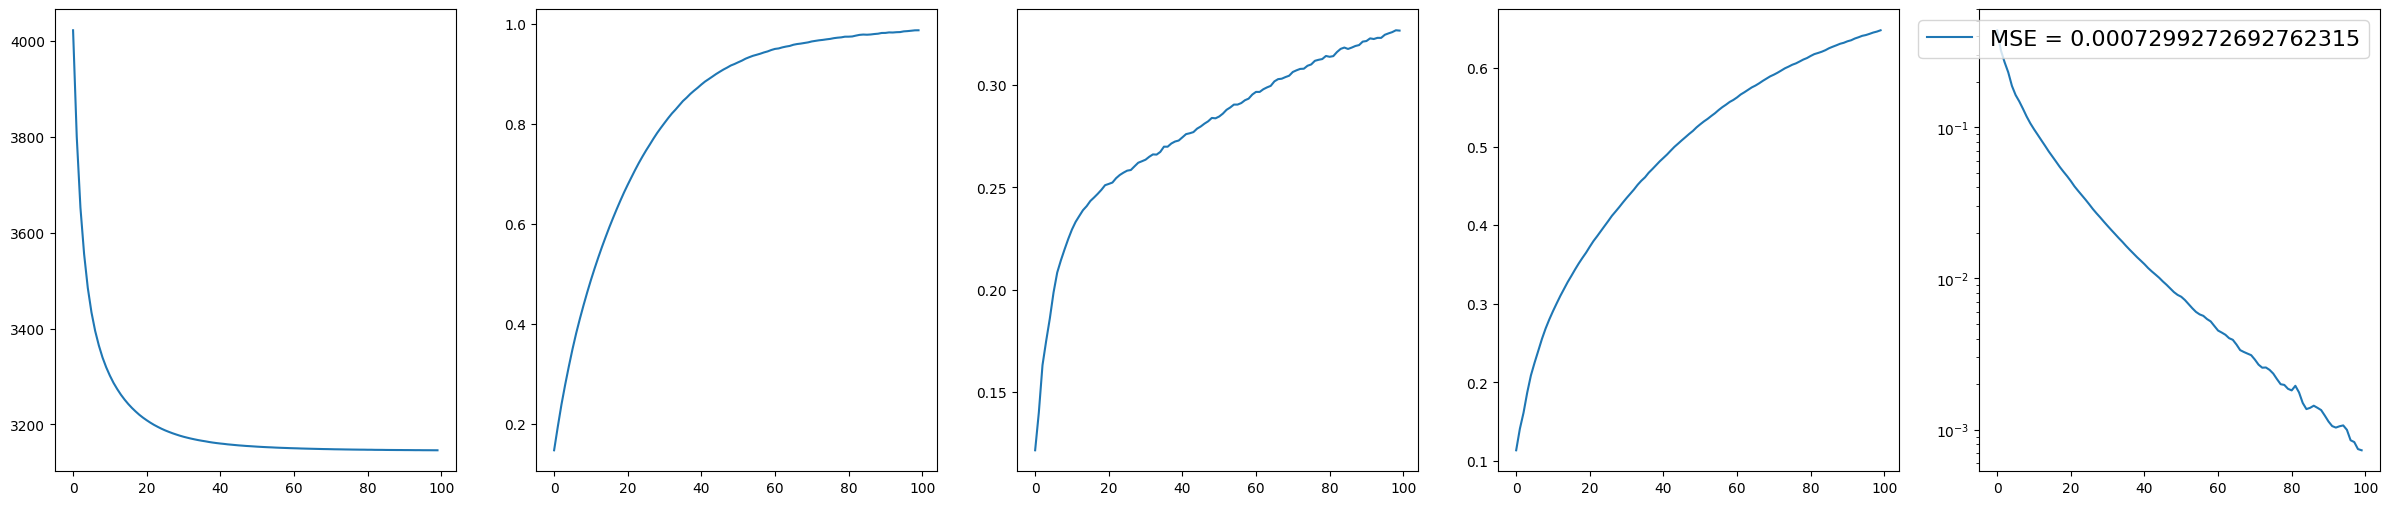

In [ ]:
from IPython.display import clear_output
%matplotlib inline

model = HawkesModel(100)
ref_model = HawkesModel(100, 1.0, 0.35, 0.7)
batch_size = 100

train_dataloader = torch.utils.data.DataLoader(dataset, batch_size = batch_size, num_workers = 0, pin_memory = True, shuffle = True)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2)
losses = []
mu = []
a = []
delta = []
mse_lambdas = []

for epoch in range(100):
  clear_output(wait=True)
  l, m = train(model, ref_model, train_dataloader, optimizer, epoch)
  losses.append(l)
  mse_lambdas.append(m)
  mu.append(model.mu.detach().numpy()[0])
  a.append(model.a.detach().numpy()[0])
  delta.append(model.delta.detach().numpy()[0])
  fig, axes = plt.subplots(1, 5, figsize=(30,6))
  axes[0].plot(losses)
  axes[1].plot(mu)
  axes[2].plot(a)
  axes[3].plot(delta)
  axes[4].plot(mse_lambdas, label = "MSE = {}".format(m))
  axes[4].set_yscale('log')
  axes[4].legend(fontsize=16, loc="upper right", bbox_to_anchor=(1,1))
  plt.show()

In [ ]:
print(model)

lambda = 0.988 + sum 0.326 * exp( - 0.648 (t - t_i))


Как видите, мы получили результаты, которые схожи с моделью генерации.

### Обучение Трансформера

#### Single head attention

Давайте реализуем single head attention. Мы должны использовать замаскированное внимание, чтобы не заглядывать в будущее.

Мы будем использовать single head в качестве модели для простоты реализации. Действительно, мультихед лучше векторизовать.

Давайте реализуем:
```
class Attention(nn.Module):
  def __init__(self, M, M_K, M_V):
    super().__init__()
    self.M = M
    self.M_K = M_K
    self.M_V = M_V
```
Здесь `M` — размер встраивания, `M_K` — размеры запроса и ключа, а `M_V` — размер значения.

Соответствующие веса:
```
    self.W_Q = Parameter(nn.init.xavier_uniform_(torch.zeros(M,M_K)))
    self.W_K = Parameter(nn.init.xavier_uniform_(torch.zeros(M,M_K)))
    self.W_V = Parameter(nn.init.xavier_uniform_(torch.zeros(M,M_V)))
```

Теперь реализуем forward слой:
```
  def forward(self, X):
    bs, L, _ = X.shape
    Q = X @ self.W_Q
    K = X @ self.W_K
    V = X @ self.W_V

    pre_softmax = Q @ K.transpose(1,2) / self.M_K ** 0.5
```
Прежде чем применять softmax и вычислять оценки, мы должны замаскировать будущее. Мы будем использовать -torch.inf, который всегда будет возвращать 0 для softmax.
```
    mask = (torch.triu(torch.ones((L,L))) - torch.eye(L)).unsqueeze(0).repeat(bs,1,1)
    pre_softmax[mask == 1] = -torch.inf
    softmax = torch.softmax(pre_softmax, dim = 2)
    S = softmax @ V
    return S
```

In [ ]:
from torch.nn import Parameter
import torch.nn as nn

class Attention(nn.Module):
  def __init__(self, M, M_K, M_V):
    super().__init__()
    self.M = M
    self.M_K = M_K
    self.M_V = M_V

    self.W_Q = Parameter(nn.init.xavier_uniform_(torch.zeros(M,M_K)))
    self.W_K = Parameter(nn.init.xavier_uniform_(torch.zeros(M,M_K)))
    self.W_V = Parameter(nn.init.xavier_uniform_(torch.zeros(M,M_V)))

  def forward(self, X):
    bs, L, _ = X.shape
    Q = X @ self.W_Q
    K = X @ self.W_K
    V = X @ self.W_V

    pre_softmax = Q @ K.transpose(1,2) / self.M_K ** 0.5
    mask = (torch.triu(torch.ones((L,L))) - torch.eye(L)).unsqueeze(0).repeat(bs,1,1)
    pre_softmax[mask == 1] = -torch.inf
    softmax = torch.softmax(pre_softmax, dim = 2)
    S = softmax @ V
    return S

#### Feed forward слой

Теперь давайте реализуем слой прямой связи, который следует использовать после внимания нескольких головок.

Это просто дополнительный слой, который состоит из двух полносвязных слоев и ReLU.

In [ ]:
class FeedForwardLayer(nn.Module):
  def __init__(self, M, M_H):
    super().__init__()
    self.layer_1 = nn.Linear(M, M_H)
    self.layer_2 = nn.Linear(M_H, M)
    self.relu = nn.ReLU()

  def forward(self, S):
    return self.layer_2(self.relu(self.layer_1(S)))

#### Модель Трансформера

##### Инициализация

Теперь давайте объединим все части в модель трансформера.

Мы рассмотрим одну модель преобразователя событийного типа.

Прежде всего мы должны инициализировать несколько головок внимания. Если хотите, можете векторизовать мультихед самостоятельно.

```
class TransformerHawkes(nn.Module):
  def __init__(self, M, M_K, M_V, M_H, num_of_attentions = 10):
    super().__init__()
    # transformer
    self.attentions = nn.ModuleList([Attention(M,M_K, M_V) for i in range(num_of_attentions)])
```

Затем мы должны вычислить результат подхода с multihead attention:
```
    self.W_O = Parameter(nn.init.xavier_uniform_(torch.zeros(num_of_attentions*M_V,M)))
```

После этого мы должны добавить слой прямой связи и окончательную нормализацию:
```
    self.feed_forward = FeedForwardLayer(M, M_H)
    self.layer_norm = nn.LayerNorm(M, eps=1e-6)
```

Мы должны ввести параметр для окончательных вычислений интенсивности, как вы помните, это $\alpha$, $\mathbf{w}$ и $b$.

```
    # intensity prediction
    self.alpha = Parameter(torch.ones(1))
    self.w  = Parameter(torch.rand(M))
    self.b = Parameter(torch.ones(1))
```

Вместо softplus мы будем использовать ReLU.
```
    self.relu = nn.ReLU()
```

##### Forward pass

Учитывая последовательности и моделируемое время, мы хотим вычислить лямбды и интеграл.

Прежде всего, мы должны подсчитать баллы:

```
def forward(self, X, times, N = 100):
    """
    Returns lambda(t_i) and lambda(u_i)
    Note: ideally it should predict next arrival time, however we need only to prove the concept, so no need to implement this right now
    """
    scores = torch.concat([attention(X) for attention in self.attentions], dim = 2)
```
Здесь N — количество смоделированных раз для интегрирования по методу Монте-Карло.

Затем мы должны вычислить скрытые состояния модели трансформатора:
```
    hiddens = scores @ self.W_O
    hiddens = self.feed_forward(hiddens)
    hiddens = self.layer_norm(hiddens)
```

Мы будем реализовывать разные методы для лямбда-вычислений и интегральных вычислений, поэтому здесь мы можем написать:
```
    lambdas = self.get_lambdas_batch(hiddens, times)

    integral = self.get_integrals(hiddens, times, N)
    
    return lambdas, integral
```

##### Лямбда-вычисление

Для вычисления лямбда мы должны реализовать два метода. `get_lambdas_batch(self, hiddens, times)` и `get_lambdas(self, t, hidden, t_j, simulated = False)`.

Первый является вспомогательным и вычисляет лямбды для батча данных. Второй метод — это общий метод, который для заданного времени прогнозирования, скрытого времени и времени события вычисляет лямбда-выражения.

`get_lambdas_batch` выполняет предварительную обработку времени и скрытых значений, чтобы формат подходил для `get_lambdas`. Мы должны предсказать следующее событие, учитывая все предыдущие события, поэтому мы должны определить время в будущем и время в прошлом, а также предсказать интенсивность будущего времени, учитывая время в прошлом и скрытое в прошлом:

```
  def get_lambdas_batch(self,hiddens, times):
    """
    Returns lambdas(t_i), i>=1
    """
    # code here
    future_times = times[:,1:]
    past_times = times[:,:-1]
    past_hiddens = hiddens[:,:-1,:]
    lambdas = self.get_lambdas(future_times, past_hiddens, past_times)
    return lambdas
```

Мы должны предсказать интенсивность в `get_lambdas`, мы будем использовать формулу из статьи Хоукса о трансформерах:
```
  def get_lambdas(self, t, hidden, t_j, simulated = False):
    if simulated:
      t_j = t_j.unsqueeze(2).repeat(1,1,t.shape[2])
    assert torch.all(t >= t_j)
    history = hidden @ self.w
    if simulated:
      history = history.unsqueeze(2)
    tmp = self.alpha * (t - t_j)/t_j + history + self.b
    out = self.relu(tmp)
    return out
```

##### Вычисление интеграла

Чтобы вычислить интеграл, мы должны сгенерировать дополнительные моменты времени и вычислить для них лямбды. Затем мы должны применить формулу $\Lambda_{MC}$.

Вычисление $t_j - t_{j-1}$ для каждой отметки времени:
```
  def get_integrals(self, hiddens, times, N):
    """
    Returns integrals per element in batch, shape = (bs,)
    """
    # code here
    future_times = times[:,1:]
    past_times = times[:,:-1]
    past_hiddens = hiddens[:,:-1,:]
    delta_times = future_times - past_times
```

Симуляция времени:
```
    bs, L = delta_times.shape
    sumulated_times = torch.rand(bs, L, N)*delta_times.unsqueeze(2)+ past_times.unsqueeze(2)
```
Вычисление лямбда-выражений для смоделированного времени:
```
    simulated_lambdas = self.get_lambdas(sumulated_times, past_hiddens, past_times, True)
    integral = torch.sum(delta_times * torch.sum(simulated_lambdas / N, dim = 2), dim = 1)
    return integral
```

##### Код

In [ ]:
class TransformerHawkes(nn.Module):
  def __init__(self, M, M_K, M_V, M_H, num_of_attentions = 10):
    super().__init__()
    # transformer
    self.attentions = nn.ModuleList([Attention(M,M_K, M_V) for i in range(num_of_attentions)])
    self.W_O = Parameter(nn.init.xavier_uniform_(torch.zeros(num_of_attentions*M_V,M)))
    self.feed_forward = FeedForwardLayer(M, M_H)
    self.layer_norm = nn.LayerNorm(M, eps=1e-6)

    # intensity prediction
    self.alpha = Parameter(torch.ones(1))
    self.w  = Parameter(torch.rand(M))
    self.b = Parameter(torch.ones(1))

    # utils
    self.relu = nn.ReLU()

  def forward(self, X, times, N = 100):
    """
    Returns lambda(t_i) and lambda(u_i)
    Note: ideally it should predict next arrival time, however we need only to prove the concept, so no need to implement this right now
    """
    scores = torch.concat([attention(X) for attention in self.attentions], dim = 2)
    hiddens = scores @ self.W_O
    hiddens = self.feed_forward(hiddens)
    hiddens = self.layer_norm(hiddens)

    lambdas = self.get_lambdas_batch(hiddens, times)

    integral = self.get_integrals(hiddens, times, N)

    return lambdas, integral

  def get_lambdas_batch(self,hiddens, times):
    """
    Returns lambdas(t_i), i>=1
    """
    # code here
    future_times = times[:,1:]
    past_times = times[:,:-1]
    past_hiddens = hiddens[:,:-1,:]
    lambdas = self.get_lambdas(future_times, past_hiddens, past_times)
    return lambdas

  def get_integrals(self, hiddens, times, N):
    """
    Returns integrals per element in batch, shape = (bs,)
    """
    # code here
    future_times = times[:,1:]
    past_times = times[:,:-1]
    past_hiddens = hiddens[:,:-1,:]
    delta_times = future_times - past_times
    bs, L = delta_times.shape
    sumulated_times = torch.rand(bs, L, N)*delta_times.unsqueeze(2)+ past_times.unsqueeze(2)
    simulated_lambdas = self.get_lambdas(sumulated_times, past_hiddens, past_times, True)
    integral = torch.sum(delta_times * torch.sum(simulated_lambdas / N, dim = 2), dim = 1)
    return integral


  def get_lambdas(self, t, hidden, t_j, simulated = False):
    if simulated:
      t_j = t_j.unsqueeze(2).repeat(1,1,t.shape[2])
    assert torch.all(t >= t_j)
    history = hidden @ self.w
    if simulated:
      history = history.unsqueeze(2)
    tmp = self.alpha * (t - t_j)/t_j + history + self.b
    out = self.relu(tmp)
    return out

#### Временное кодирование

Мы также должны реализовать временное кодирование. Мы должны реализовать класс `Dataset` с методами `__getitem__` и `__len__`.

Учитывая время и размер эмбеддинга, мы вычисляем временное кодирование:

```
    self.z = torch.arange(0,M)[None,None,:].repeat(self.N,self.L,1)
    self.z = torch.cos(
              self.times.unsqueeze(2)/10000**((self.z - 1)/M)
            ) * (self.z % 2 == 1) \
           + torch.sin(
              self.times.unsqueeze(2)/10000**(self.z/M)
            ) * (self.z % 2 == 0)
```

In [ ]:
from torch.utils.data import Dataset

class Embeddings(Dataset):
  def __init__(self, times, M):
    """Temporal encoding only"""
    self.N, self.L = times.shape
    self.times = times
    self.z = torch.arange(0,M)[None,None,:].repeat(self.N,self.L,1)
    self.z = torch.cos(
              self.times.unsqueeze(2)/10000**((self.z - 1)/M)
            ) * (self.z % 2 == 1) \
           + torch.sin(
              self.times.unsqueeze(2)/10000**(self.z/M)
            ) * (self.z % 2 == 0)


  def __getitem__(self, index):
    return self.times[index, ...], self.z[index, ...]

  def __len__(self):
    return self.N

#### Обучение

##### Подготовка

In [ ]:
import numpy as np

def train(model, ref_model, train_loader, optimizer, epoch):
    model.train()
    ll = []
    mse_lambdas = []
    for batch_idx, (times, batch) in enumerate(train_loader):
        optimizer.zero_grad()
        lambdas, integral = model(batch, times)
        ref_lambdas = ref_model.lambdas(times)[:,1:]
        mse_lambdas.append(torch.mean((lambdas - ref_lambdas)**2).item())
        negative_ll = - torch.sum(torch.log(lambdas + 1e-8)) + torch.sum(integral)
        negative_ll.backward()
        optimizer.step()
        ll.append(negative_ll.item())
    return np.mean(ll), np.mean(mse_lambdas)

Эталонная модель, чтобы мы могли сравнить прогнозируемую интенсивность.

In [ ]:
class Hawkes(torch.nn.Module):
  def __init__(self, L, init_mu = 0.1, init_a = 0.1, init_delta = 0.1):
    super().__init__()
    self.mu = torch.nn.Parameter(init_mu*torch.ones(1))
    self.a = torch.nn.Parameter(init_a*torch.ones(1))
    self.delta = torch.nn.Parameter(init_delta*torch.ones(1))
    self.L = L
    self.V = torch.tril(torch.ones((L,L)), diagonal=-1)
    self.V = self.V.unsqueeze(0)

  def forward(self, batch):
    """
    Returns loss
    Note: ideally it should predict next arrival time, however we need only to prove the concept, so no need to implement this right now
    """
    # events
    lambda_loss = - torch.sum(torch.log(self.lambdas(batch)))

    # non events
    integral_loss = self.integral(batch)

    return lambda_loss + integral_loss

  def lambdas(self, batch):
    """Returns lambda(t_{i,j}) for all i, j (do not sum, we will use this function later)"""
    S = batch.unsqueeze(2).repeat(1,1,self.L)
    S = S - S.transpose(1,2)
    lambdas = self.mu + torch.sum(torch.exp(-self.delta * S) * (self.a * self.V), dim = 2)
    return lambdas

  def integral(self, batch):
    """Returns integral loss (do not forget to sum)"""
    base = self.mu * batch[:, -1]
    last = batch[:,-1].unsqueeze(1).repeat(1,self.L)
    exps = (self.a - self.a * torch.exp(-self.delta * (last - batch)))/self.delta

    integral_loss = torch.sum(base) + torch.sum(exps)
    return integral_loss

  def __str__(self):
    return "lambda = {:.3f} + sum {:.3f} * exp( - {:.3f} (t - t_i))".format(self.mu.detach().numpy()[0], self.a.detach().numpy()[0], self.delta.detach().numpy()[0])

##### Обучение

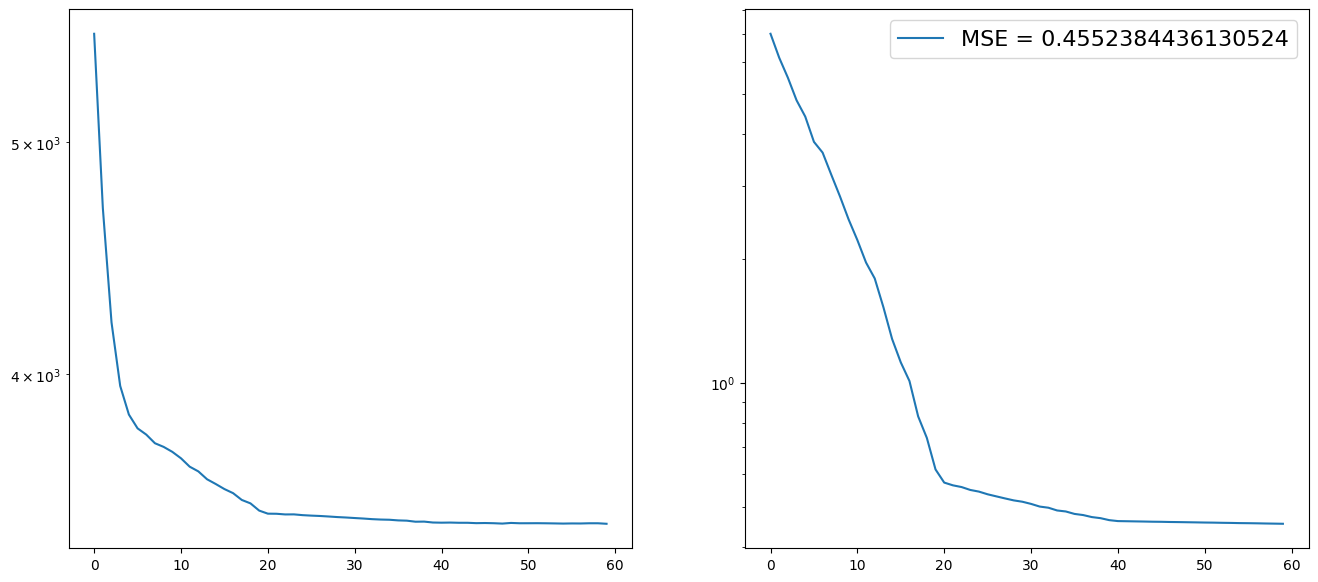

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

dataset_with_embeddings = Embeddings(dataset, 2)

ref_model = Hawkes(100, 1.0, 0.35, 0.7)
model = TransformerHawkes(2,2,2,2,1)
batch_size = 100

train_dataloader = torch.utils.data.DataLoader(dataset_with_embeddings, batch_size = batch_size, num_workers = 0, pin_memory = True, shuffle = True)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 20, 0.1)

losses = []
mse_lambdas = []

for epoch in range(60):
  clear_output(wait=True)
  l,m = train(model, ref_model, train_dataloader, optimizer, epoch)
  losses.append(l)
  mse_lambdas.append(m)
  scheduler.step()

  fig, axes = plt.subplots(1, 2, figsize=(16,7))
  axes[0].plot(losses)
  axes[0].set_yscale('log')
  axes[1].plot(mse_lambdas, label = "MSE = {}".format(m))
  axes[1].set_yscale('log')
  axes[1].legend(fontsize=16, loc="upper right", bbox_to_anchor=(1,1))
  plt.show()


#### Вопрос - что нужно поменять, чтобы мы могли работать с последовательностями из нескольких типов событий разной длины?

- Нам нужно добавить типы событий в датасет ```self.event_types```, проверить, что у нас нет событий типа 0, который мы будем использовать как padding, иначе сдвинуть типы событий (```self.event_types += 1```).
- Нужно добавить ```nn.Embedding(num_embeddings, embedding_dim, padding_idx=0)``` и добавить выход из данного слоя к временному представлению.
- Нужно использовать zero padding с помощью функции ```torch.nn.functional.pad```, чтобы учесть последовательности разных времен в трансформере.
- Нужно изменить
```
self.alpha = Parameter(torch.ones(1))
self.w  = Parameter(torch.rand(M))
self.b = Parameter(torch.ones(1))
```
на
```
self.alpha = Parameter(torch.ones(n_types))
self.w  = Parameter(torch.rand(M,n_types))
self.b = Parameter(torch.ones(n_types))
```
и использовать соответствующую функцию интенсивности в $\sum \log \lambda_{c_i}(t_i)$


Вместо того, чтобы реализовывать данную модель руками, можно использовать следующую реализацию https://github.com/SimiaoZuo/Transformer-Hawkes-Process

## Эксперименты с реальными данными

Для реальных примеров мы будем использовать модель Neural Hawkes.

### Neural Hawkes

https://github.com/xiao03/nh

### Загрузка данных

Прежде всего, мы должны загрузить данные, которые мы будем использовать для обучения.

In [ ]:
!pip install googledrivedownloader
from googledrivedownloader import download_file_from_google_drive

download_file_from_google_drive(file_id='0BwqmV0EcoUc8bllCOGJzVXNjSVk',
                                dest_path='./train.pkl')

In [ ]:
# Install the PyDrive wrapper & import libraries.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '0BwqmV0EcoUc8bllCOGJzVXNjSVk'
downloaded = drive.CreateFile({'id':file_id})
downloaded.FetchMetadata(fetch_all=True)
downloaded.GetContentFile(downloaded.metadata['title'])

Это набор данных твитов с историей действий твитов. Давайте откроем файл.

In [ ]:
!pip install pickle-mixin --upgrade

  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5988 sha256=ebbfc23b691bc7600c3b82f19443ff080d1a6654768ee396fb4f3f451cde10ac
  Stored in directory: /root/.cache/pip/wheels/d0/9c/0d/8709be17c02b72bf04ea60d8ec64fc46a1554c0fb81e048dd6
Successfully built pickle-mixin


In [ ]:
import pickle
with open('./train.pkl','rb') as f:
  train_dset = pickle.load(f, encoding='latin1')

In [ ]:
train_dset.keys()

dict_keys(['test1', 'args', 'dim_process', 'dev', 'train', 'test'])

In [ ]:
train_dset[b'train'][0]

[{b'time_since_start': 15.0, b'time_since_last_event': 15.0, b'type_event': 1},
 {b'time_since_start': 16.0, b'time_since_last_event': 1.0, b'type_event': 1},
 {b'time_since_start': 19.0, b'time_since_last_event': 3.0, b'type_event': 1},
 {b'time_since_start': 23.0, b'time_since_last_event': 4.0, b'type_event': 1},
 {b'time_since_start': 23.0, b'time_since_last_event': 0.0, b'type_event': 0},
 {b'time_since_start': 25.0, b'time_since_last_event': 2.0, b'type_event': 1},
 {b'time_since_start': 28.0, b'time_since_last_event': 3.0, b'type_event': 0},
 {b'time_since_start': 30.0, b'time_since_last_event': 2.0, b'type_event': 0},
 {b'time_since_start': 32.0, b'time_since_last_event': 2.0, b'type_event': 0},
 {b'time_since_start': 33.0, b'time_since_last_event': 1.0, b'type_event': 0},
 {b'time_since_start': 34.0, b'time_since_last_event': 1.0, b'type_event': 0},
 {b'time_since_start': 36.0, b'time_since_last_event': 2.0, b'type_event': 0},
 {b'time_since_start': 39.0, b'time_since_last_even

Здесь нам нужен только ключ  'train'; 'test', 'dev' и 'test1' пусты, эти данные в других файлах. Dev — это проверочный набор данных, мы его тоже загрузим.

Количество типов событий равно трем.

In [ ]:
train_dset[b'dim_process']

3

### Neural Hawkes

#### Функции утилит

`generate_sim_time_seqs` позволяет нам генерировать время для интегрального вычисления MC. Sim_index_seq — это вспомогательная последовательность для вычисления затухания скрытого состояния.

In [ ]:
import torch

def generate_sim_time_seqs(time_seqs, seqs_length):
    """Generate a simulated time interval sequences from original time interval sequences based on uniform distribution

    Args:
        time_seqs: list of torch float tensors
    Results:
        sim_time_seqs: list of torch float tensors
        sim_index_seqs: list of torch long tensors
    """
    sim_time_seqs = torch.zeros((time_seqs.size()[0], time_seqs.size()[1]-1)).float()
    sim_index_seqs = torch.zeros((time_seqs.size()[0], time_seqs.size()[1]-1)).long()
    restore_time_seqs, restore_sim_time_seqs = [], []
    for idx, time_seq in enumerate(time_seqs):
        restore_time_seq = torch.stack([torch.sum(time_seq[0:i]) for i in range(1,seqs_length[idx]+1)])
        restore_sim_time_seq, _ = torch.sort(torch.empty(seqs_length[idx]-1).uniform_(0, restore_time_seq[-1]))

        sim_time_seq = torch.zeros(seqs_length[idx]-1)
        sim_index_seq = torch.zeros(seqs_length[idx]-1).long()

        for idx_t, t in enumerate(restore_time_seq):
            indices_to_update = restore_sim_time_seq > t

            sim_time_seq[indices_to_update] = restore_sim_time_seq[indices_to_update] - t
            sim_index_seq[indices_to_update] = idx_t

        restore_time_seqs.append(restore_time_seq)
        restore_sim_time_seqs.append(restore_sim_time_seq)
        sim_time_seqs[idx, :seqs_length[idx]-1] = sim_time_seq
        sim_index_seqs[idx, :seqs_length[idx]-1] = sim_index_seq

    return sim_time_seqs, sim_index_seqs

`pad_bos` функция позволяет дополнять последовательности, а также добавляет дополнительное нулевое событие, запускающее последовательность.

In [ ]:
def pad_bos(batch_data, type_size):
    event_seqs, time_seqs, total_time_seqs, seqs_length = batch_data
    pad_event_seqs = torch.zeros((event_seqs.size()[0], event_seqs.size()[1]+1)).long() * type_size
    pad_time_seqs = torch.zeros((time_seqs.size()[0], event_seqs.size()[1]+1)).float()

    pad_event_seqs[:, 1:] = event_seqs.clone()
    pad_event_seqs[:, 0] = type_size
    pad_time_seqs[:, 1:] = time_seqs.clone()

    return pad_event_seqs, pad_time_seqs, total_time_seqs, seqs_length

#### Датасет

In [ ]:
import pickle
import torch
from torch.utils.data import Dataset, DataLoader

class CTLSTMDataset(Dataset):
    ''' Dataset class for neural hawkes data
    '''
    def __init__(self, file_path):
        self.file_path = file_path
        self.event_seqs = []
        self.time_seqs = []

        with open(self.file_path, 'rb') as f:
            if 'dev' in file_path:
                seqs = pickle.load(f)[b'dev']
            elif 'train' in file_path:
                seqs = pickle.load(f)[b'train'][:1000] # crop
            for idx, seq in enumerate(seqs):
                # if idx == 1:
                #     print(seq[0].keys())
                self.event_seqs.append(torch.LongTensor([int(event[b'type_event']) for event in seq]))
                self.time_seqs.append(torch.FloatTensor([float(event[b'time_since_last_event']) for event in seq]))

    def __len__(self):
        return len(self.event_seqs)

    def __getitem__(self, index):
        sample = {
            'event_seq': self.event_seqs[index],
            'time_seq': self.time_seqs[index]
        }

        return sample

def pad_batch_fn(batch_data):
    sorted_batch = sorted(batch_data, key=lambda x: x['event_seq'].size(), reverse=True)
    event_seqs = [seq['event_seq'].long() for seq in sorted_batch]
    time_seqs = [seq['time_seq'].float() for seq in sorted_batch]
    seqs_length = torch.LongTensor(list(map(len, event_seqs)))
    last_time_seqs = torch.stack([torch.sum(time_seq) for time_seq in time_seqs])

    event_seqs_tensor = torch.zeros(len(sorted_batch), seqs_length.max()).long()
    time_seqs_tensor = torch.zeros(len(sorted_batch), seqs_length.max()).float()

    for idx, (event_seq, time_seq, seqlen) in enumerate(zip(event_seqs, time_seqs, seqs_length)):
        event_seqs_tensor[idx, :seqlen] = torch.LongTensor(event_seq)
        time_seqs_tensor[idx, :seqlen] = torch.FloatTensor(time_seq)

    return event_seqs_tensor, time_seqs_tensor, last_time_seqs, seqs_length

#### Модель

In [ ]:
"""A continuous time LSTM network."""
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader


class CTLSTM(nn.Module):
    """Continuous time LSTM network with decay function."""
    def __init__(self, hidden_size, type_size, batch_first=True):
        super(CTLSTM, self).__init__()

        self.hidden_size = hidden_size
        self.type_size = type_size
        self.batch_first = batch_first
        self.num_layers = 1

        # Parameters
        # recurrent cells
        self.rec = nn.Linear(2*self.hidden_size, 7*self.hidden_size)
        # output mapping from hidden vectors to unnormalized intensity
        self.wa = nn.Linear(self.hidden_size, self.type_size)
        # embedding layer for valid events, including BOS
        self.emb = nn.Embedding(self.type_size+1, self.hidden_size)

    def init_states(self, batch_size):
        self.h_d = torch.zeros(batch_size, self.hidden_size, dtype=torch.float)
        self.c_d = torch.zeros(batch_size, self.hidden_size, dtype=torch.float)
        self.c_bar = torch.zeros(batch_size, self.hidden_size, dtype=torch.float)
        self.c = torch.zeros(batch_size, self.hidden_size, dtype=torch.float)

    def recurrence(self, emb_event_t, h_d_tm1, c_tm1, c_bar_tm1):
        feed = torch.cat((emb_event_t, h_d_tm1), dim=1)
        # B * 2H
        (gate_i,
        gate_f,
        gate_z,
        gate_o,
        gate_i_bar,
        gate_f_bar,
        gate_delta) = torch.chunk(self.rec(feed), 7, -1)

        gate_i = torch.sigmoid(gate_i)
        gate_f = torch.sigmoid(gate_f)
        gate_z = torch.tanh(gate_z)
        gate_o = torch.sigmoid(gate_o)
        gate_i_bar = torch.sigmoid(gate_i_bar)
        gate_f_bar = torch.sigmoid(gate_f_bar)
        gate_delta = F.softplus(gate_delta)

        c_t = gate_f * c_tm1 + gate_i * gate_z
        c_bar_t = gate_f_bar * c_bar_tm1 + gate_i_bar * gate_z

        return c_t, c_bar_t, gate_o, gate_delta

    def decay(self, c_t, c_bar_t, o_t, delta_t, duration_t):
        c_d_t = c_bar_t + (c_t - c_bar_t) * \
            torch.exp(-delta_t * duration_t.view(-1,1))

        h_d_t = o_t * torch.tanh(c_d_t)

        return c_d_t, h_d_t

    def forward(self, event_seqs, duration_seqs, batch_first = True):
        if batch_first:
            event_seqs = event_seqs.transpose(0,1)
            duration_seqs = duration_seqs.transpose(0,1)

        batch_size = event_seqs.size()[1]
        batch_length = event_seqs.size()[0]

        h_list, c_list, c_bar_list, o_list, delta_list = [], [], [], [], []
        self.init_states(batch_size)
        for t in range(batch_length):
            c, self.c_bar, o_t, delta_t = self.recurrence(self.emb(event_seqs[t]), self.h_d, self.c_d, self.c_bar)
            self.c_d, self.h_d = self.decay(c, self.c_bar, o_t, delta_t, duration_seqs[t])
            h_list.append(self.h_d)
            c_list.append(c)
            c_bar_list.append(self.c_bar)
            o_list.append(o_t)
            delta_list.append(delta_t)
        h_seq = torch.stack(h_list)
        c_seq = torch.stack(c_list)
        c_bar_seq = torch.stack(c_bar_list)
        o_seq = torch.stack(o_list)
        delta_seq = torch.stack(delta_list)

        self.output = torch.stack((h_seq, c_seq, c_bar_seq, o_seq, delta_seq))
        return self.output

    def log_likelihood(self, event_seqs, sim_time_seqs, sim_index_seqs, total_time_seqs, seqs_length, batch_first=True):
        """Calculate log likelihood per sequence."""
        batch_size, batch_length = event_seqs.shape
        h, c, c_bar, o, delta = torch.chunk(self.output, 5, 0)
        # L * B * H
        h = torch.squeeze(h, 0)
        c = torch.squeeze(c, 0)
        c_bar = torch.squeeze(c_bar, 0)
        o = torch.squeeze(o, 0)
        delta = torch.squeeze(delta, 0)

        # Calculate the sum of log intensities of each event in the sequence
        original_loglikelihood = torch.zeros(batch_size)
        lambda_k = F.softplus(self.wa(h)).transpose(0, 1)

        for idx, (event_seq, seq_len) in enumerate(zip(event_seqs, seqs_length)):
            original_loglikelihood[idx] = torch.sum(torch.log(
                                                     lambda_k[idx, torch.arange(seq_len).long(), event_seq[1:seq_len+1]]))

        # Calculate simulated loss from MCMC method
        h_d_list = []
        if batch_first:
            sim_time_seqs = sim_time_seqs.transpose(0,1)
        for idx, sim_duration in enumerate(sim_time_seqs):
            _, h_d_idx = self.decay(c[idx], c_bar[idx], o[idx], delta[idx], sim_duration)
            h_d_list.append(h_d_idx)
        h_d = torch.stack(h_d_list)

        sim_lambda_k = F.softplus(self.wa(h_d)).transpose(0,1)
        simulated_likelihood = torch.zeros(batch_size)
        for idx, (total_time, seq_len) in enumerate(zip(total_time_seqs, seqs_length)):
            mc_coefficient = total_time / (seq_len)
            simulated_likelihood[idx] = mc_coefficient * torch.sum(torch.sum(sim_lambda_k[idx, torch.arange(seq_len).long(), :]))

        loglikelihood = torch.sum(original_loglikelihood - simulated_likelihood)
        return loglikelihood

#### Обучение

In [ ]:
import time
import datetime
import torch
import torch.optim as opt
from torch.utils.data import DataLoader

def train(hidden_size, type_size, train_path, batch_size, epoch_num, current_date):
    """Training process."""
    model = CTLSTM(hidden_size, type_size)
    optim = opt.Adam(model.parameters(), lr=1e-3)
    scheduler = torch.optim.lr_scheduler.StepLR(optim, 10, 0.5)
    train_dataset = CTLSTMDataset(train_path)

    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=pad_batch_fn, shuffle=True)

    last_dev_loss = 0.0
    for epoch in range(epoch_num):
        tic_epoch = time.time()
        epoch_train_loss = 0.0
        epoch_dev_loss = 0.0
        train_event_num = 0
        dev_event_num = 0
        print('Epoch.{} starts.'.format(epoch))
        tic_train = time.time()
        for i_batch, sample_batched in enumerate(train_dataloader):
            tic_batch = time.time()

            optim.zero_grad()

            event_seqs, time_seqs, total_time_seqs, seqs_length = pad_bos(sample_batched, model.type_size)

            sim_time_seqs, sim_index_seqs = generate_sim_time_seqs(time_seqs, seqs_length)

            model.forward(event_seqs, time_seqs)
            likelihood = model.log_likelihood(event_seqs, sim_time_seqs, sim_index_seqs, total_time_seqs, seqs_length)
            batch_event_num = torch.sum(seqs_length)
            batch_loss = -likelihood

            batch_loss.backward()
            optim.step()
            scheduler.step()

            toc_batch = time.time()
            if i_batch % 1 == 0:
                print('Epoch.{} Batch.{}:\nBatch Likelihood per event: {:5f} nats\nTrain Time: {:2f} s'.format(epoch, i_batch, likelihood/batch_event_num, toc_batch-tic_batch))
            epoch_train_loss += batch_loss
            train_event_num += batch_event_num

        toc_train = time.time()
        print('---\nEpoch.{} Training set\nTrain Likelihood per event: {:5f} nats\nTrainig Time:{:2f} s'.format(epoch, -epoch_train_loss/train_event_num, toc_train-tic_train))

    return

In [ ]:
train(128, 3, './train.pkl' ,100, 10, '28.03.2022')

Epoch.0 starts.
Epoch.0 Batch.0:
Batch Likelihood per event: -5194.777344 nats
Train Time: 7.258365 s
Epoch.0 Batch.1:
Batch Likelihood per event: -4599.017578 nats
Train Time: 4.367969 s
Epoch.0 Batch.2:
Batch Likelihood per event: -3644.190430 nats
Train Time: 4.461688 s
Epoch.0 Batch.3:
Batch Likelihood per event: -2950.999268 nats
Train Time: 7.544198 s
Epoch.0 Batch.4:
Batch Likelihood per event: -3471.432617 nats
Train Time: 7.356628 s
Epoch.0 Batch.5:
Batch Likelihood per event: -2354.091553 nats
Train Time: 5.064442 s
Epoch.0 Batch.6:
Batch Likelihood per event: -2011.102905 nats
Train Time: 5.258351 s
Epoch.0 Batch.7:
Batch Likelihood per event: -1448.854980 nats
Train Time: 6.052946 s
